# Анализ данных по вакансиям с сайта HH.ru

## Описание проекта и данных

### Описание проекта

Описание проекта
    
Цель проекта: выявить различия  в предлагаемых вакансия для Аналитиков данных и Специалистов по Data Science.

Задачи исследования: выполнить  загрузку полученных информационных данных, провести их первичный анализ, выполнить предобработку, провести исследование, позволяющее ответить на следующие вопросы:

1. Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.

2. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалистов по Data Sience.

3. Определение типичного места работы для Аналитика данных и Специалиста по Data Sience по следующим параметрам:

 - ТОП-работодателей по числу вакансий,
 - зарплата,
 - тип занятости,
 - график работы.
 
Ответы дать отдельно для грейдов Junior, Junior+, Middle, Senior.

4. Определить, какие навыки чаще спрашивают - твердые или мягкие. К какому грейду и к какой специальности требований больше.

5. Определение наиболее желаемых кандидатов на вакансии для Аналитика данных и Специалиста по Data Sience по следующим параметрам:
 - самые важные hard-skils,
 - самые важные soft-skils.
 
Ответы дать отдельно для грейдов Junior, Junior+, Middle, Senior.

6. Выполнить расчет помесячной динамики количества вакансий для Аналитика данных и Специалиста по Data Sience. Ответы дать отдельно для грейдов Junior, Junior+, Middle, Senior.

7. Формулирование выводов и рекомендаций.

### Описание данных

**Таблица `vacancies_da.xlsx`: содержит данные по вакансиям аналитик данных.**

**Таблица `vacancies_ds.xlsx`: содержит данные по вакансиям Специалист Data Science.**

Далее приведено описание полей. Для обеих таблиц они одинаковые.

`id` — уникальный идентификатор вакансии;

`name` — название вакансии;

`published_at` — дата публикации;

`alternate_url` — ссылка на вакансию;

`type` — статус вакансии на момент получения данных от api и передачи их в базу;

`employer`— работодатель;

`department` — работодатель, отдел;

`area` — регион места работы;

`experience` — требуемый опыт работы;

`key_skills` — ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения от api;

`schedule` — график работы;

`employment` — тип занятости;

`description` — описание вакансии;

`description_lemmatized` — лемматизированное описание вакансии

`salary_from` — нижняя граница предлагаемой заработной платы;

`salary_to` — верхняя граница предлагаемой заработной платы;

`salary_bin` — категория зарплаты;

`key_skills_from_key_skills_field`— ключевые навыки из поля вакансии `key_scills`;

`hard_skills_from_description` — "твердые" навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api;

`soft_skills_from_description` — "мягкие" навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.

### Этапы работы

1. Загрузка данных и изучение общей информации.

2. Предобработка данных.

3. Исследовательский анализ данных. Формирование ответов на поставленные вопросы.

4. Презентация.

5. Выводы.

### Шаг 1. Загрузка данных и изучение общей информации.

*Импортируем необходимые для проведения работы библиотеки.*

In [1]:
import time
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from datetime import date, timedelta as td
from datetime import datetime, timedelta

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')

*Выполним загрузку предоставленной информации и сохраним ее в датафреймы.*

In [2]:
try:
    data_analitic, data_sc = (
        pd.read_excel('vacancies_da.xlsx'),
        pd.read_excel('vacancies_ds.xlsx')           
    )


except:
    print('Загрузите данные!!! Ссылка на файлы: <https://disk.yandex.ru/d/en_e87RKy9akHg>')
#    data_analitic, data_sc = (
#        pd.read_excel('https://disk.yandex.ru/i/rtdRIW0yuS9_gg/vacancies_da.xlsx'),
#        pd.read_excel('https://disk.yandex.ru/i/qPk5ZPR2wGJ6wA/vacancies_ds.xlsx')           
#    )
    


*Выведем служебную информацию по каждому полученному датафрейму и первые 10 строк для первичного изучения.*

In [3]:
display(data_analitic.info(),data_analitic.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

None

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
1  100039480                         Аналитик данных 2024-05-24 09:39:00   
2  100042705         Аналитик данных (исследователь) 2024-05-24 10:01:25   
3  100046788                 Ведущий аналитик данных 2024-05-24 10:28:18   
4  100056244                         Аналитик данных 2024-05-24 11:27:40   

                     alternate_url      type           employer  \
0  https://hh.ru/vacancy/100039284  Открытая  DNS Головной офис   
1  https://hh.ru/vacancy/100039480  Открытая              Комус   
2  https://hh.ru/vacancy/100042705  Открытая  DNS Головной офис   
3  https://hh.ru/vacancy/100046788  Открытая           Х5 Group   
4  https://hh.ru/vacancy/100056244  Открытая             ЛУКОЙЛ   

                   department         area             experience  \
0                         NaN  Владивосток  Junior (no experince)   
1                         NaN       Москва  Junior (no experince)   
2                         NaN  Владивосток    Junior+ (1-3 years)   
3  X5 GROUP, Центральный офис       Москва    Junior+ (1-3 years)   
4                         NaN       Москва     Middle (3-6 years)   

                                          key_skills     schedule  \
0              ['Power BI', 'СУБД', 'Python', 'SQL']  Полный день   
1   ['MS SQL', 'Работа с базами данных', 'MS Excel']  Полный день   
2  ['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...  Полный день   
3  ['Анализ данных', 'Коммуникация', 'SQL', 'MS O...  Полный день   
4                                   ['Документация']  Полный день   

         employment                                        description  \
0  Полная занятость  наше направление занимается повышением эффекти...   
1  Полная занятость  сегодня комус один из крупнейших поставщиков о...   
2  Полная занятость  наше направление занимается повышением эффекти...   
3  Полная занятость  задачи:  разработка бизнес-моделей для группов...   
4  Полная занятость  обязанности:  участие в проектировании, разраб...   

                              description_lemmatized  salary_from  salary_to  \
0  наш направление заниматься повышение эффективн...      60000.0        NaN   
1  сегодня комус крупный поставщик офисный товар ...          NaN        NaN   
2  наш направление заниматься повышение эффективн...      90000.0        NaN   
3  задача разработка бизнес модель групповой прог...          NaN        NaN   
4  обязанность участие проектирование разработка ...          NaN        NaN   

      salary_bin                   key_skills_from_key_skills_field  \
0  ЗП не указана                        SQL, Power BI, Python, СУБД   
1  ЗП не указана           Работа с базами данных, MS SQL, MS Excel   
2  ЗП не указана      SQL, Power BI, Python, СУБД, BPMN, Clickhouse   
3  ЗП не указана  MS Office, SQL, Python, Hadoop, Нive, Аналитич...   
4  ЗП не указана                                                NaN   

  hard_skills_from_description soft_skills_from_description  
0                          NaN                          NaN  
1                          NaN                          NaN  
2                          NaN                          NaN  
3       Pandas, Юнит-экономика                 Коммуникация  
4                          NaN                 Документация

In [4]:
display(data_sc.info(),data_sc.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   department                        413 non-null    object        
 7   area                              974 non-null    object        
 8   experience                        974 non-null    object        
 9   key_skills                        974 non-null    object        
 10  schedule                          974 non-null    

None

id                                name        published_at  \
0  100049339   Стажер Data Science (Новосибирск) 2024-05-24 10:44:01   
1  100051447                      Data Scientist 2024-05-24 10:58:18   
2  100070495        ML Engineer / Data Scientist 2024-05-24 13:15:26   
3  100076648              Team Lead Data Science 2024-05-24 14:07:00   
4  100077910       Data Analyst / Data Scientist 2024-06-08 14:17:47   
5  100079219           Senior Data Scientist MLE 2024-06-08 14:29:15   
6  100088790                      Data Scientist 2024-05-24 15:44:41   
7  100094269  Middle/Senior Data Scientist (LLM) 2024-05-24 16:33:00   
8  100096283                Эксперт Data Science 2024-05-24 16:56:18   
9  100096836           Data Scientist/Data miner 2024-05-24 17:01:31   

                     alternate_url      type  \
0  https://hh.ru/vacancy/100049339  Открытая   
1  https://hh.ru/vacancy/100051447  Открытая   
2  https://hh.ru/vacancy/100070495  Открытая   
3  https://hh.ru/vacancy/100076648  Открытая   
4  https://hh.ru/vacancy/100077910  Открытая   
5  https://hh.ru/vacancy/100079219  Открытая   
6  https://hh.ru/vacancy/100088790  Открытая   
7  https://hh.ru/vacancy/100094269  Открытая   
8  https://hh.ru/vacancy/100096283  Открытая   
9  https://hh.ru/vacancy/100096836  Открытая   

                              employer               department  \
0                                 СБЕР       Сбер для экспертов   
1  Бюро кредитных историй Скоринг Бюро                      NaN   
2                               ГК ФСК                      NaN   
3                                 СБЕР       Сбер для экспертов   
4                                Итсен                      NaN   
5                            Автомакон                      NaN   
6                           Ростелеком                      NaN   
7                                 СБЕР       Сбер для экспертов   
8                           МТС Финтех  МТС Банк. Головной офис   
9                          Интерлизинг                      NaN   

              area             experience  \
0      Новосибирск  Junior (no experince)   
1           Москва    Junior+ (1-3 years)   
2           Москва    Junior+ (1-3 years)   
3           Москва     Middle (3-6 years)   
4           Москва     Middle (3-6 years)   
5           Москва     Middle (3-6 years)   
6  Санкт-Петербург    Junior+ (1-3 years)   
7           Москва     Middle (3-6 years)   
8           Москва    Junior+ (1-3 years)   
9  Санкт-Петербург    Junior+ (1-3 years)   

                                          key_skills          schedule  \
0                                                 []       Полный день   
1  ['Python', 'Hadoop', 'Machine Learning', 'Рабо...  Удаленная работа   
2  ['Python', 'PyTorch', 'Machine Learning', 'Doc...       Полный день   
3                                                 []       Полный день   
4  ['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...       Полный день   
5  ['Python', 'sklearn', 'PostgreSQL', 'numpy', '...  Удаленная работа   
6  ['Python', 'Machine Learning', 'SQL', 'Big Dat...  Удаленная работа   
7                                                 []       Полный день   
8                  ['Python', 'Документация', 'SQL']       Полный день   
9  ['Python', 'Работа с базами данных', 'Статисти...       Полный день   

         employment                                        description  \
0        Стажировка  sberseasons - оплачиваемая программа стажирово...   
1  Полная занятость  бюро кредитных историй «скоринг бюро» является...   
2  Полная занятость  о компании и команде: группа компаний фск – мн...   
3  Полная занятость  наша команда разрабатывает модели машинного об...   
4  Полная занятость  мы ищем талантливого middle data analyst / dat...   
5  Полная занятость  обязанности:  собирать данные из dwh; эксперим...   
6  Полная занятость  привет, будущий заклинатель данных! хочешь при...   
7  Полная занятость  ищем senior\middle+ data s

*В связи с тем, что обе таблицы содержат идентичные поля и типы полей совпадают, для удобстава работы с данными объединим таблицы в один датафрейм, предварительно введем дополнительное поле с идентификатором вакансии.*

In [5]:
data_analitic['name_type'] = 'da'
data_sc['name_type'] = 'ds'
# Объеденим таблицы
data = pd.concat([data_analitic, data_sc])
# Проверим количество строк из каждой таблицы вошедших в объединенный датасет
data['name_type'].value_counts()

da    1801
ds     974
Name: name_type, dtype: int64

*Число строк, разделенных по признаку совпадает с исходными таблицами. В дальнейшем работаем с датафреймом `data`.* 

In [6]:
display(data.info(),data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2775 entries, 0 to 973
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                2775 non-null   int64         
 1   name                              2775 non-null   object        
 2   published_at                      2775 non-null   datetime64[ns]
 3   alternate_url                     2775 non-null   object        
 4   type                              2775 non-null   object        
 5   employer                          2775 non-null   object        
 6   department                        934 non-null    object        
 7   area                              2775 non-null   object        
 8   experience                        2775 non-null   object        
 9   key_skills                        2775 non-null   object        
 10  schedule                          2775 non-null  

None

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
1  100039480                         Аналитик данных 2024-05-24 09:39:00   
2  100042705         Аналитик данных (исследователь) 2024-05-24 10:01:25   
3  100046788                 Ведущий аналитик данных 2024-05-24 10:28:18   
4  100056244                         Аналитик данных 2024-05-24 11:27:40   
5  100059110   Senior Data Analyst (Цифровой билайн) 2024-06-11 11:45:29   
6  100060772                         Аналитик данных 2024-05-24 11:56:20   
7  100069131                           Дата аналитик 2024-05-24 13:05:01   
8  100069821                         Аналитик данных 2024-06-10 16:49:49   
9  100071014                         Аналитик данных 2024-06-07 11:08:22   

                     alternate_url      type  \
0  https://hh.ru/vacancy/100039284  Открытая   
1  https://hh.ru/vacancy/100039480  Открытая   
2  https://hh.ru/vacancy/100042705  Открытая   
3  https://hh.ru/vacancy/100046788  Открытая   
4  https://hh.ru/vacancy/100056244  Открытая   
5  https://hh.ru/vacancy/100059110  Открытая   
6  https://hh.ru/vacancy/100060772  Открытая   
7  https://hh.ru/vacancy/100069131  Открытая   
8  https://hh.ru/vacancy/100069821  Открытая   
9  https://hh.ru/vacancy/100071014  Открытая   

                                      employer                  department  \
0                            DNS Головной офис                         NaN   
1                                        Комус                         NaN   
2                            DNS Головной офис                         NaN   
3                                     Х5 Group  X5 GROUP, Центральный офис   
4                                       ЛУКОЙЛ                         NaN   
5                                       билайн   билайн: ИТ, Data, Digital   
6  ГКУ Центр занятости населения города Москвы                         NaN   
7                                         СБЕР          Сбер для экспертов   
8                                          МТС                      «МТС»    
9                                 Россети Урал                         NaN   

              area             experience  \
0      Владивосток  Junior (no experince)   
1           Москва  Junior (no experince)   
2      Владивосток    Junior+ (1-3 years)   
3           Москва    Junior+ (1-3 years)   
4           Москва     Middle (3-6 years)   
5           Москва     Middle (3-6 years)   
6           Москва    Junior+ (1-3 years)   
7  Санкт-Петербург    Junior+ (1-3 years)   
8           Казань    Junior+ (1-3 years)   
9     Екатеринбург    Junior+ (1-3 years)   

                                          key_skills          schedule  \
0              ['Power BI', 'СУБД', 'Python', 'SQL']       Полный день   
1   ['MS SQL', 'Работа с базами данных', 'MS Excel']       Полный день   
2  ['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...       Полный день   
3  ['Анализ данных', 'Коммуникация', 'SQL', 'MS O...       Полный день   
4                                   ['Документация']       Полный день   
5     ['Python', 'SQL', 'Математическая статистика']  Удаленная работа   
6                                                 []       Полный день   
7  ['Документация', 'Проактивность', 'Коммуникация']       Полный день   
8                                                 []       Полный день   
9                         ['Аналитическое мышление']       Полный день   

         employment                                        description  \
0  Полная занятость  наше направление занимается повышением эффекти...   
1  Полная занятость  сегодня комус один из крупнейших поставщиков о...   
2  Полная занятость  наше направление занимается повышением эффекти...   
3  Полная занятость  задачи:  разработка бизнес-моделей для группов...   
4  Полная занятость  обязанности:  участие в проектировании, разраб...   
5  Полная занятость  сегодня б

**Выводы по разделу:**

Загружены библиотеки необходимые для выполнения работы. Загружены полученные данные - это два датафрейма. Информация о данных приведена в описании. Первчино изучены типы данных, количество строк и колонок. Введено поле - идентификатор вакансии и выполнено объединение таблиц в одну.

### Шаг 2. Предобработка данных

2.1 Основная предобработка данных

*Для контроля сохранности данных зафиксируем количесвто строк исходной таблицы.*

In [7]:
temp = data.copy() # создаем копию датасета до преобразования

len(temp)

2775

*По результатам изучения типов данных - отсуствует необходимость в изменении типов данных, все данные соответствуют заявленному типу.*

*Проанализируем названия колонок.*

In [8]:
data.columns

Index(['id', 'name', 'published_at', 'alternate_url', 'type', 'employer',
       'department', 'area', 'experience', 'key_skills', 'schedule',
       'employment', 'description', 'description_lemmatized', 'salary_from',
       'salary_to', 'salary_bin', 'key_skills_from_key_skills_field',
       'hard_skills_from_description', 'soft_skills_from_description',
       'name_type'],
      dtype='object')

*Переименование не требуется.*

*Проверим наличие дубликатов.*

In [9]:
print('Явные дубликаты:', data.duplicated().sum())

Явные дубликаты: 0


*Проверим на дубликаты по полю `id`.*

In [10]:
data[data['id'].duplicated(keep=False)].sort_values(by=['id', 'published_at'])

id                                               name  \
400   91765959                     Дата аналитик (Data Scientist)   
218   91765959                     Дата аналитик (Data Scientist)   
401   91765960                     Дата аналитик (Data Scientist)   
219   91765960                     Дата аналитик (Data Scientist)   
412   92068025    Аналитик данных (data scientist, data engineer)   
..         ...                                                ...   
85   101324992  Data Analyst (Data Science и клиентская аналит...   
240  101336320  Data Analyst (команда Data Science и клиентска...   
90   101336320  Data Analyst (команда Data Science и клиентска...   
268  101446151                   Data Scientist (Аналитик данных)   
115  101446151                   Data Scientist (Аналитик данных)   

           published_at                    alternate_url      type  \
400 2024-04-04 10:10:44   https://hh.ru/vacancy/91765959  Открытая   
218 2024-04-04 10:10:44   https://hh.ru/vacancy/91765959  Открытая   
401 2024-03-28 06:25:29   https://hh.ru/vacancy/91765960  Открытая   
219 2024-03-28 06:25:29   https://hh.ru/vacancy/91765960  Открытая   
412 2024-03-12 12:42:01   https://hh.ru/vacancy/92068025  Открытая   
..                  ...                              ...       ...   
85  2024-06-05 10:42:00  https://hh.ru/vacancy/101324992  Открытая   
240 2024-06-05 12:25:00  https://hh.ru/vacancy/101336320  Открытая   
90  2024-06-05 12:25:00  https://hh.ru/vacancy/101336320  Открытая   
268 2024-06-10 07:59:56  https://hh.ru/vacancy/101446151  Открытая   
115 2024-06-10 07:59:56  https://hh.ru/vacancy/101446151  Открытая   

                                              employer  \
400                        Центр финансовых технологий   
218                        Центр финансовых технологий   
401                        Центр финансовых технологий   
219                        Центр финансовых технологий   
412  Федеральное государственное автономное учрежде...   
..                                                 ...   
85                                                СБЕР   
240                                               СБЕР   
90                                                СБЕР   
268                          Московский Кредитный Банк   
115                          Московский Кредитный Банк   

                                   department             area  \
400                                       NaN  Санкт-Петербург   
218                                       NaN  Санкт-Петербург   
401                                       NaN      Новосибирск   
219                                       NaN      Новосибирск   
412                                       NaN           Москва   
..                                        ...              ...   
85                         Сбер для экспертов           Москва   
240                        Сбер для экспертов           Москва   
90                         Сбер для экспертов           Москва   
268  Московский Кредитный Банк. Профессионалы           Москва   
115  Московский Кредитный Банк. Профессионалы           Москва   

              experience                                         key_skills  \
400  Junior+ (1-3 years)                                         ['Pandas']   
218  Junior+ (1-3 years)                                         ['Pandas']   
401  Junior+ (1-3 years)                                         ['Pandas']   
219  Junior+ (1-3 years)                                         ['Pandas']   
412   Middle (3-6 years)  ['Пусконаладочные работы', 'Оформление описани...   
..                   ...                                                ...   
85    Middle (3-6 years)                                                 []   
240  Junior+ (1-3 years)                                                 []   
90   Junior+ (1-3 years)                                                 []   
268  Junior+ (1-3 years)  ['Анализ данных', 'Коммуникация', 'S

*Таким образом, получено 54 дублирующих строки, которые отличаются только типом вакансии, т.е. изначально при формировании данных для исследования вакансии попали в обе таблицы, т.к. в наименовании присутствует отсылка и к той и другой профессии. Удалять такие дубликаты не будем.*

*Теперь проверим наоборот, что все поля совпадают, но при этом `id` и `published_at` разные.*

In [11]:
data[data.duplicated(
    subset=['name', 'type', 'employer', 'department',
            'area', 'experience', 'key_skills', 'schedule',
            'employment', 'description', 'salary_bin', 'name_type'],
    keep=False
    )].sort_values(by=['name', 'employer', 'area', 'experience','key_skills', 'published_at'])

id                                               name  \
1408   98088004                       BI-аналитик/ Аналитик данных   
72    100463980                       BI-аналитик/ Аналитик данных   
501    95520058    Cпециалист по работе с данными (Data Scientist)   
10    100293732    Cпециалист по работе с данными (Data Scientist)   
631    94702965                                       Data Analyst   
...         ...                                                ...   
517    95613788                      Эконометрист / Data scientist   
805    97991099                      Эконометрист / Data scientist   
11    100296110                      Эконометрист / Data scientist   
1302   97652565  Эксперт-аналитик данных в группу цифрового аудита   
1777   99869022  Эксперт-аналитик данных в группу цифрового аудита   

            published_at                    alternate_url      type  \
1408 2024-05-12 17:09:30   https://hh.ru/vacancy/98088004  Открытая   
72   2024-06-09 10:00:29  https://hh.ru/vacancy/100463980  Открытая   
501  2024-04-08 15:55:08   https://hh.ru/vacancy/95520058  Открытая   
10   2024-06-10 11:49:46  https://hh.ru/vacancy/100293732  Открытая   
631  2024-03-13 16:57:00   https://hh.ru/vacancy/94702965  Открытая   
...                  ...                              ...       ...   
517  2024-03-27 13:03:38   https://hh.ru/vacancy/95613788  Открытая   
805  2024-04-26 13:19:13   https://hh.ru/vacancy/97991099  Открытая   
11   2024-05-27 08:31:02  https://hh.ru/vacancy/100296110  Открытая   
1302 2024-04-22 18:24:19   https://hh.ru/vacancy/97652565  Открытая   
1777 2024-05-22 18:35:43   https://hh.ru/vacancy/99869022  Открытая   

                          employer          department    area  \
1408                        Сэлвим                 NaN  Москва   
72                          Сэлвим                 NaN  Москва   
501                   Открытый код                 NaN  Самара   
10                    Открытый код                 NaN  Самара   
631                           СБЕР  Сбер. Data Science  Москва   
...                            ...                 ...     ...   
517                          Okkam                 NaN  Москва   
805                          Okkam                 NaN  Москва   
11                           Okkam                 NaN  Москва   
1302  Recruitment Boutique S.M.Art                 NaN  Москва   
1777  Recruitment Boutique S.M.Art                 NaN  Москва   

               experience                     key_skills     schedule  \
1408  Junior+ (1-3 years)                     ['Pandas']  Полный день   
72    Junior+ (1-3 years)                     ['Pandas']  Полный день   
501   Junior+ (1-3 years)                     ['Pandas']  Полный день   
10    Junior+ (1-3 years)                     ['Pandas']  Полный день   
631   Junior+ (1-3 years)                     ['Pandas']  Полный день   
...                   ...                            ...          ...   
517    Middle (3-6 years)     ['Pandas', 'Коммуникация']  Полный день   
805    Middle (3-6 years)     ['Pandas', 'Коммуникация']  Полный день   
11     Middle (3-6 years)     ['Pandas', 'Коммуникация']  Полный день   
1302  Junior+ (1-3 years)  ['Аудит', 'Python', 'MS SQL']  Полный день   
1777  Junior+ (1-3 years)  ['Аудит', 'Python', 'MS SQL']  Полный день   

            employment                                        description  \
1408  Полная занятость  обязанности:  сбор бизнес-требований от внутре...   
72    Полная занятость  обязанности:  сбор бизнес-требований от внутре...   
501   Полная занятость  что нужно делать:  анализ исходных данных, очи...   
10    Полная занятость  что нужно делать:  анализ исходных данных, очи...   
631   Полная занятость  наша команда занимается разработкой и внедрени...   
...                ...                                                ...   
517   Полная занятость  привет!мы - коммуникационная группа okkam. наш...   
805   Полная занятость  привет!мы

*Получили 645 таких строчек, при этом некоторые повторяются более чем по два раза, отличаясь только идентификатором и месяцем публикации, т.е. это есть это одно и то же объявление с автоматическим продлением или перебуликацией. Логичнее будет оставить только первичную публикацию указанных вакансий.*

In [12]:
# Зафиксируем количество строк до удаления дублей
data_after = data.shape[0]
data_after

2775

In [13]:
data = data.drop_duplicates(
              subset=['name', 'type', 'employer', 'department',
                      'area', 'experience', 'key_skills', 'schedule',
                      'employment', 'description', 'salary_bin', 'name_type'],
              keep='first'
              )
print(f'Удалили: {(data_after - data.shape[0])} строчек, {(data_after - data.shape[0]) / data_after:.2%} данных')

Удалили: 345 строчек, 12.43% данных


*Проверим ряд строковых полей на уменьшение количества уникальных значений после приведения к одному регистру.*

In [14]:
print(data['name'].nunique(), data['name'].str.lower().str.strip().nunique())
print(data['employer'].nunique(), data['employer'].str.lower().str.strip().nunique())
print(data['area'].nunique(), data['area'].str.lower().str.strip().nunique())
print(data['key_skills'].nunique(), data['key_skills'].str.lower().str.strip().nunique())

1228 1156
844 844
74 74
1212 1210


*Получили, что регистр почти не оказывает влияние на данные. Значит наличие скрытых дубликатов стремится к нулю по данным полям.*

*Далее проверим ряд полей на корректность указанных грейдов и наличие пустых или лишних наименований.*

In [15]:
data['experience'].value_counts()

Junior+ (1-3 years)      1339
Middle (3-6 years)        884
Junior (no experince)     167
Senior (6+ years)          40
Name: experience, dtype: int64

In [16]:
data['salary_bin'].value_counts()

ЗП не указана                2145
От 100 тысяч до 200 тысяч     106
Меньше 100 тысяч               70
Больше 300 тысяч               57
От 200 тысяч до 300 тысяч      52
Name: salary_bin, dtype: int64

In [17]:
data['type'].value_counts()

Открытая    2430
Name: type, dtype: int64

In [18]:
data['schedule'].value_counts()

Полный день         1889
Удаленная работа     454
Гибкий график         74
Сменный график        13
Name: schedule, dtype: int64

In [19]:
data['employment'].value_counts()

Полная занятость       2367
Стажировка               32
Частичная занятость      22
Проектная работа          9
Name: employment, dtype: int64

*Имеющиеся данные в этих полях адекватны.*

*Проверим наличие пропущенных значений.*

In [20]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('YlGnBu_r')

*Поля `department`, `key_skills_from_key_skills_field`, `hard_skills_from_description`, `soft_skills_from_description` имеют значительное количество пропусков в таблице, но т.к. данные поля являются производными от основных - то пропуски обработке не подвергаем и данными полями в дальнейшем анализе не пользуемся. Поля `salary_from` и `salary_to` - имеют значительное число пропусков, при этом уровень зарплаты является важным моментом при решении поставленных задач, оставляем пропуски без замены на медианные или средние значения.*

*Убеждаемся, что все данные сохранились за исключением удаленных дубликатов.*

In [21]:
a, b = len(temp), len(data)
print(a, b, round((a-b)/a*100, 2))

2775 2430 12.43


*Создаем датафрейм для дальнейшей работы, исключив из исходной таблицы поля, которые не будем использовать в работе.*

In [22]:
analyse = data.drop(['alternate_url', 'type', 'department', 'description', 'description_lemmatized', 
             'key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description'], axis=1)
display(analyse.info(),analyse.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2430 entries, 0 to 972
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            2430 non-null   int64         
 1   name          2430 non-null   object        
 2   published_at  2430 non-null   datetime64[ns]
 3   employer      2430 non-null   object        
 4   area          2430 non-null   object        
 5   experience    2430 non-null   object        
 6   key_skills    2430 non-null   object        
 7   schedule      2430 non-null   object        
 8   employment    2430 non-null   object        
 9   salary_from   401 non-null    float64       
 10  salary_to     285 non-null    float64       
 11  salary_bin    2430 non-null   object        
 12  name_type     2430 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 265.8+ KB


None

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
1  100039480                         Аналитик данных 2024-05-24 09:39:00   
2  100042705         Аналитик данных (исследователь) 2024-05-24 10:01:25   
3  100046788                 Ведущий аналитик данных 2024-05-24 10:28:18   
4  100056244                         Аналитик данных 2024-05-24 11:27:40   

            employer         area             experience  \
0  DNS Головной офис  Владивосток  Junior (no experince)   
1              Комус       Москва  Junior (no experince)   
2  DNS Головной офис  Владивосток    Junior+ (1-3 years)   
3           Х5 Group       Москва    Junior+ (1-3 years)   
4             ЛУКОЙЛ       Москва     Middle (3-6 years)   

                                          key_skills     schedule  \
0              ['Power BI', 'СУБД', 'Python', 'SQL']  Полный день   
1   ['MS SQL', 'Работа с базами данных', 'MS Excel']  Полный день   
2  ['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...  Полный день   
3  ['Анализ данных', 'Коммуникация', 'SQL', 'MS O...  Полный день   
4                                   ['Документация']  Полный день   

         employment  salary_from  salary_to     salary_bin name_type  
0  Полная занятость      60000.0        NaN  ЗП не указана        da  
1  Полная занятость          NaN        NaN  ЗП не указана        da  
2  Полная занятость      90000.0        NaN  ЗП не указана        da  
3  Полная занятость          NaN        NaN  ЗП не указана        da  
4  Полная занятость          NaN        NaN  ЗП не указана        da

2.2 Дополнительная обработка данных:

1. Добавление поля с месяцем публикации вакансии.

2. Оптимизация поля `salary_bin`.

3. Оптимизация поля `key_skills`.

*Добавим поле с месяцем публикации вакансии для выполнения поставленной задачи по анализу динамики публикаций.*

In [23]:
analyse['month'] = analyse['published_at'].dt.month

In [24]:
analyse.head(3)

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
1  100039480                         Аналитик данных 2024-05-24 09:39:00   
2  100042705         Аналитик данных (исследователь) 2024-05-24 10:01:25   

            employer         area             experience  \
0  DNS Головной офис  Владивосток  Junior (no experince)   
1              Комус       Москва  Junior (no experince)   
2  DNS Головной офис  Владивосток    Junior+ (1-3 years)   

                                          key_skills     schedule  \
0              ['Power BI', 'СУБД', 'Python', 'SQL']  Полный день   
1   ['MS SQL', 'Работа с базами данных', 'MS Excel']  Полный день   
2  ['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...  Полный день   

         employment  salary_from  salary_to     salary_bin name_type  month  
0  Полная занятость      60000.0        NaN  ЗП не указана        da      5  
1  Полная занятость          NaN        NaN  ЗП не указана        da      5  
2  Полная занятость      90000.0        NaN  ЗП не указана        da      5

*С учетом имеющейся информации по нижнему и верхнему пределу зарплаты дополним поле `salary_bin`.
Определим, в каких строках поля категория ЗП не указана зарплата, но при этом имеются данные в полях по нижнему и верхнему пределу зарплаты.*

In [25]:
analyse.loc[(analyse['salary_bin'] == 'ЗП не указана') & (analyse['salary_from'].notna())]['id'].count()

214

In [26]:
analyse.loc[(analyse['salary_bin'] == 'ЗП не указана') & (analyse['salary_to'].notna())]['id'].count()

0

*В 213 строчках имеются данные по нижнему уровню зарплаты. Перенесем эти данные в поле `salary_bin` с учетом имеющейся градации.*

In [27]:
def salary_category(row: pd.Series):
  if row['salary_bin'] == 'ЗП не указана':
    if row.isna()['salary_from']:
      return 'ЗП не указана'
    elif row['salary_from'] < 100000:
      return 'Меньше 100 тысяч'
    elif row['salary_from'] >= 100000 and row['salary_from'] < 200000:
      return 'От 100 тысяч до 200 тысяч'
    elif row['salary_from'] >= 200000 and row['salary_from'] < 300000:
      return 'От 200 тысяч до 300 тысяч'
    else:
      return 'Больше 300 тысяч'
  else:
    return row['salary_bin']

In [28]:
analyse['salary_bin'] = analyse.apply(salary_category, axis=1)

In [29]:
analyse.head(1)

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   

            employer         area             experience  \
0  DNS Головной офис  Владивосток  Junior (no experince)   

                              key_skills     schedule        employment  \
0  ['Power BI', 'СУБД', 'Python', 'SQL']  Полный день  Полная занятость   

   salary_from  salary_to        salary_bin name_type  month  
0      60000.0        NaN  Меньше 100 тысяч        da      5

In [30]:
# определим минимальную и максимальную даты привлечения пользователей:
print('Минимальная дата публикации:', analyse['published_at'].min())
print('Максимальная дата публикации:', analyse['published_at'].max())

Минимальная дата публикации: 2024-02-13 21:45:51
Максимальная дата публикации: 2024-06-11 15:07:30


*Сформируем столбцы по hard и soft навыкам, используя данные столбца `key_skills`.*

In [31]:
# создадим отдельный датафрейм, в котором перечисления поля key_skills разобьем по составляющим
df_key = analyse
df_key['key_skills'] = df_key['key_skills'].str.split(',')
df_key = df_key.explode('key_skills')
df_key['key_skills'] = (df_key['key_skills'].str.lower().str.strip())
df_key['key_skills'] = df_key['key_skills'].apply(lambda x: x.replace('"', '').
                                                    replace('[', '').replace(']', '').replace("'", ""))
df_key.head(3)

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   

            employer         area             experience key_skills  \
0  DNS Головной офис  Владивосток  Junior (no experince)   power bi   
0  DNS Головной офис  Владивосток  Junior (no experince)       субд   
0  DNS Головной офис  Владивосток  Junior (no experince)     python   

      schedule        employment  salary_from  salary_to        salary_bin  \
0  Полный день  Полная занятость      60000.0        NaN  Меньше 100 тысяч   
0  Полный день  Полная занятость      60000.0        NaN  Меньше 100 тысяч   
0  Полный день  Полная занятость      60000.0        NaN  Меньше 100 тысяч   

  name_type  month  
0        da      5  
0        da      5  
0        da      5

In [32]:
# убедимся, что исходная для анализа таблица не изменилась
analyse.head(3)

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
1  100039480                         Аналитик данных 2024-05-24 09:39:00   
2  100042705         Аналитик данных (исследователь) 2024-05-24 10:01:25   

            employer         area             experience  \
0  DNS Головной офис  Владивосток  Junior (no experince)   
1              Комус       Москва  Junior (no experince)   
2  DNS Головной офис  Владивосток    Junior+ (1-3 years)   

                                          key_skills     schedule  \
0         [['Power BI',  'СУБД',  'Python',  'SQL']]  Полный день   
1  [['MS SQL',  'Работа с базами данных',  'MS Ex...  Полный день   
2  [['SQL',  'Power BI',  'СУБД',  'Python',  'Cl...  Полный день   

         employment  salary_from  salary_to        salary_bin name_type  month  
0  Полная занятость      60000.0        NaN  Меньше 100 тысяч        da      5  
1  Полная занятость          NaN        NaN     ЗП не указана        da      5  
2  Полная занятость      90000.0        NaN  Меньше 100 тысяч        da      5

In [33]:
df_key['key_skills'].nunique()

1000

In [34]:
df_key['key_skills'].value_counts().head(20)

sql                                    902
python                                 891
pandas                                 629
                                       473
анализ данных                          419
документация                           395
аналитическое мышление                 364
коммуникация                           258
power bi                               206
работа с базами данных                 188
ms excel                               187
работа с большим объемом информации    169
data analysis                          166
математическая статистика              164
аналитика                              159
confluence                             158
machine learning                       143
ms sql                                 137
базы данных                            128
ml                                     111
Name: key_skills, dtype: int64

In [35]:
# выявим полный список soft навыков
data_soft = data
data_soft['soft_skills_from_description'] = data_soft['soft_skills_from_description'].str.split(',')
data_soft = data_soft.explode('soft_skills_from_description')
data_soft['soft_skills_from_description'] = (data_soft['soft_skills_from_description'].str.lower().str.strip())

data_soft.head(3)

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
1  100039480                         Аналитик данных 2024-05-24 09:39:00   
2  100042705         Аналитик данных (исследователь) 2024-05-24 10:01:25   

                     alternate_url      type           employer department  \
0  https://hh.ru/vacancy/100039284  Открытая  DNS Головной офис        NaN   
1  https://hh.ru/vacancy/100039480  Открытая              Комус        NaN   
2  https://hh.ru/vacancy/100042705  Открытая  DNS Головной офис        NaN   

          area             experience  \
0  Владивосток  Junior (no experince)   
1       Москва  Junior (no experince)   
2  Владивосток    Junior+ (1-3 years)   

                                          key_skills     schedule  \
0              ['Power BI', 'СУБД', 'Python', 'SQL']  Полный день   
1   ['MS SQL', 'Работа с базами данных', 'MS Excel']  Полный день   
2  ['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...  Полный день   

         employment                                        description  \
0  Полная занятость  наше направление занимается повышением эффекти...   
1  Полная занятость  сегодня комус один из крупнейших поставщиков о...   
2  Полная занятость  наше направление занимается повышением эффекти...   

                              description_lemmatized  salary_from  salary_to  \
0  наш направление заниматься повышение эффективн...      60000.0        NaN   
1  сегодня комус крупный поставщик офисный товар ...          NaN        NaN   
2  наш направление заниматься повышение эффективн...      90000.0        NaN   

      salary_bin               key_skills_from_key_skills_field  \
0  ЗП не указана                    SQL, Power BI, Python, СУБД   
1  ЗП не указана       Работа с базами данных, MS SQL, MS Excel   
2  ЗП не указана  SQL, Power BI, Python, СУБД, BPMN, Clickhouse   

  hard_skills_from_description soft_skills_from_description name_type  
0                          NaN                          NaN        da  
1                          NaN                          NaN        da  
2                          NaN                          NaN        da

In [36]:
data_soft['soft_skills_from_description'].nunique()

17

In [37]:
data_soft['soft_skills_from_description'].value_counts().head(45)

документация               395
коммуникация               258
аналитическое мышление     162
проактивность               58
креативность                22
переговоры                  13
презентация результатов     11
принятие решений            11
адаптивность                 9
внимание к деталям           7
решение проблем              7
лидерство                    4
работа в команде             4
критическое мышление         3
письменная коммуникация      2
тайм-менеджмент              2
эмпатия                      1
Name: soft_skills_from_description, dtype: int64

In [38]:
# создадим список из soft навыков
str_soft_skills =  ['документация', 'коммуникация', 'аналитическое мышление', 'проактивность',
 'креативность', 'переговоры', 'принятие решений', 'презентация результатов',
 'адаптивность', 'внимание к деталям', 'решение проблем', 'работа в команде',
 'лидерство', 'критическое мышление', 'письменная коммуникация', 'тайм-менеджмент',
 'эмпатия']

*Таблицу `df_key` и список soft навыков `str_soft_skills` будем использовать в дальнейшем для решения поставленных задач в части анализа требуемых навыков.*

In [39]:
analyse['name_type'].value_counts()

da    1587
ds     843
Name: name_type, dtype: int64

**Выводы по разделу**

Проведена предобработка данных, в ходе которой выполнены следующие шаги и сформулированы первичные выводы по полученным данным:
- типы данных соответствуют содержанию и не требуют изменения;
- явные дубликаты отсутствуют;
- проанализированы возможные скрытые дубликаты: дубликаты по `id` не удаляем, т.к. разница в этих объявлениях только в том, что они отсылают и к вакансии Аналитик данных и к Специалисту по данным; проверены дубликаты, которые наоборот совпадают по всем полям, но имеют разные `id`, получили что такие строки имеются и отличаются только временем публикации, что скорее всего говорит  том, что одно и то же объявление повторно или более публиковалось с определенным периодом (раз месяц) – такие дубликаты убрали, оставив первое упоминание о данных публикациях;
- по итогу удалено 345 строк или 12,43% информации;
- проверена корректность заполнения полей с качественной информацией, лишних наименований или аномалий не выявлено, в том числе с учетом регистра;
- количественные поля (`salary_from` и `salary_to`) на выбросы не проверены, т.к. эти поля сами по себе в анализе участвовать не будут и только возможно частичное заполнение, используя информацию из них для заполнения пустых данных поля `salary_bin`;
- выполнена проверка на пропущенные значения: поля `department`, `key_skills_from_key_skills_field`, `hard_skills_from_description`, `soft_skills_from_description` имеют значительное количество пропусков в таблице, но т.к. данные поля являются производными от основных - то пропуски обработке не подвергаем и данными полями в дальнейшем анализе не пользуемся. Поля `salary_from` и `salary_to` - имеют значительное число пропусков, при этом уровень зарплаты является важным моментом при решении поставленных задач, оставляем пропуски без замены на медианные или средние значения;
- создан датафрейм, с которым в дальнейшем будем работать – исключены неактуальные поля.
Проведена дополнительная предобработка:
- добавлено поле с месяцем публикации для дальнейшего анализа;
- выполнено дополнение пустых значений поля `salary_bin` за счет `salary_from`;
- создан отдельный датафрейм для удобства анализа hard и soft навыков с разбиением списка навыков и созданием отдельных столбцов; подготовлен список soft навыков для анализа в дальнейшем.




### Шаг 3. Исследовательский анализ данных. Формирование ответов на поставленные вопросы.

3.1 Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.

In [40]:
temp_exp = analyse.groupby(['experience', 'name_type'])
temp_result = pd.DataFrame({'count': temp_exp.size()})
temp_result['relation'] = (temp_result['count'] / temp_result.groupby(level=0)['count'].sum() * 100).round(1)
temp_result = temp_result.reset_index()
temp_result

experience name_type  count  relation
0  Junior (no experince)        da    126      75.4
1  Junior (no experince)        ds     41      24.6
2    Junior+ (1-3 years)        da    970      72.4
3    Junior+ (1-3 years)        ds    369      27.6
4     Middle (3-6 years)        da    480      54.3
5     Middle (3-6 years)        ds    404      45.7
6      Senior (6+ years)        da     11      27.5
7      Senior (6+ years)        ds     29      72.5

In [41]:
fig = px.bar(temp_result, 
             x = 'experience', 
             y = 'relation',
             title = 'Доля Аналитиков данных/ Специалистов Data Science', 
             text = 'relation',
             color='name_type',
             pattern_shape='name_type',
             pattern_shape_sequence=['x', '+'])
fig.update_layout(xaxis_title = 'Грейд по опыту',
                  yaxis_title = 'Доля публикаций вакансий')
fig.update_traces(hovertemplate = 'Грейд по опыту: %{x} <br>Доля: %{y}%')

fig.show()

Львиная доля вакансий приходится на аналитиков данных по грейдам без опыта, 1- 3 года и 3 - 6 лет. Максимальная доля на специалистов по данным приходится только на сотрудников с опытом более 6 лет.

3.2 Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалистов по Data Sience.

In [42]:
analyse_experience_da = analyse.loc[analyse['name_type']== 'da']
analyse_experience_ds = analyse.loc[analyse['name_type']== 'ds']

In [43]:
# готовим данные для графика
analyse_experience_da = pd.DataFrame(analyse_experience_da['experience'].value_counts()).reset_index()

fig = go.Figure(data=[go.Pie(labels=analyse_experience_da['index'], # указываем значения для на меток сегментах
                             values=analyse_experience_da['experience'], # указываем данные для отображения на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Распределение доли грейдов вакансии Аналитик данных', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Грейд',
                                    showarrow=False)])
fig.show() # выводим график

In [44]:
# готовим данные для графика
analyse_experience_ds = pd.DataFrame(analyse_experience_ds['experience'].value_counts()).reset_index()

fig = go.Figure(data=[go.Pie(labels=analyse_experience_ds['index'], # указываем значения для меток сегментов
                             values=analyse_experience_ds['experience'], # указываем данные для отображения на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Распределение доли грейдов вакансии Специалист Data Science', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Грейд',
                                    showarrow=False)])
fig.show() # выводим график

По вакансии аналитик данных больше всего востребованы специалисты с опытом 1 - 3 года (более 61%), второе место занимают мидлы со стажем 3 - 6 лет (30%). У специалистов по данным ситуация наоборот: почти 48% - это мидлы, чуть более 43% - с опытом 1 - 3 года. Для вакансии аналитик данных охотнее берут без опыта работы, чем на специалистов по данным. При этом для специалистов по данным чаще ищут с большим опытом в работе.

3.3 Определение типичного места работы для Аналитика данных и Специалиста по Data Sience по следующим параметрам:

 - ТОП-работодателей по числу вакансий,
 - зарплата,
 - тип занятости,
 - график работы.


*Проанализируем сначала в целом ТОП-организаций в представленных данных.*

In [45]:
da_data = analyse.loc[analyse['name_type']== 'da']['employer'].value_counts().reset_index().head(10)
ds_data = analyse.loc[analyse['name_type']== 'ds']['employer'].value_counts().reset_index().head(10)

In [46]:
display(da_data, ds_data)

index  employer
0                                   СБЕР       201
1                            WILDBERRIES        34
2                                   Ozon        30
3                         Банк ВТБ (ПАО)        26
4                                     Т1        23
5                                    МТС        21
6                 МАГНИТ, Розничная сеть        20
7  Центральный банк Российской Федерации        15
8                        Райффайзен Банк        13
9                                   Okko        13

index  employer
0            СБЕР       167
1            Ozon        29
2     Газпромбанк        24
3    Samokat.tech        19
4  Банк ВТБ (ПАО)        16
5              Т1        13
6          билайн        11
7      Ростелеком        11
8     Lamoda Tech        10
9   Газпром нефть        10

*Создадим функцию для нанесения подписей значений для графиков.*

In [47]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches :
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = '{:.0f}'.format(p.get_height())
                ax.text (_x, _y, value, size=25, ha="center") 
        elif orient == "h":
            for p in ax.patches :
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - 0.25
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, size=25, ha="left")

    if isinstance(axs, np.ndarray ):
        for idx, ax in np.ndenumerate (axs):
            _single(ax)
    else :
        _single(axs)

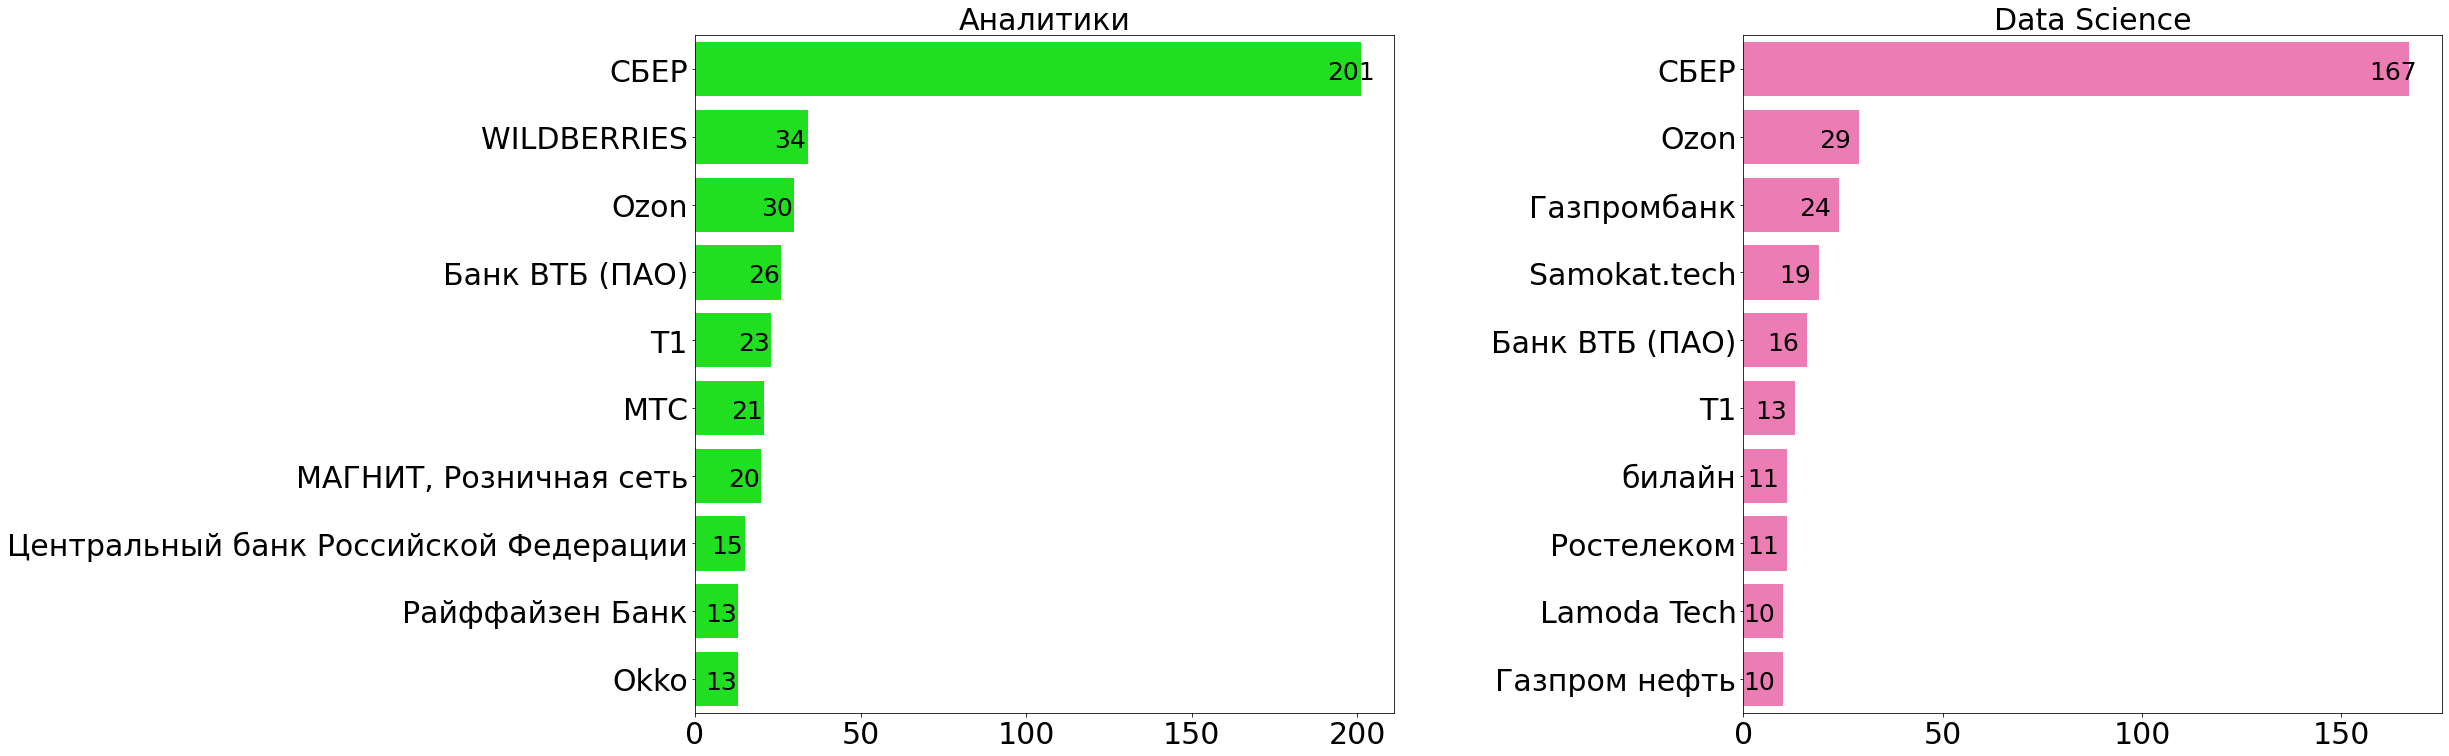

In [48]:
# Сформируем поле для диаграмм
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
fig. tight_layout ()
# График для аналитиков данных
p0 = sns.barplot(x='employer', y='index', data=da_data, ax=ax[0], color='Lime')
show_values(p0,'h', space=-10)
#add_label(da_data)
ax[0].set_title(f"Аналитики", fontsize=30)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].tick_params(axis='both', which='major', labelsize=30)

# График для аналитиков данны
p1 = sns.barplot(x='employer', y='index', data=ds_data, ax=ax[1], color='HotPink')
show_values(p1,'h', space=-10)
ax[1].set_title(f"Data Science", fontsize=30)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].tick_params(axis='both', which='major', labelsize=30)

plt.subplots_adjust(wspace = 0.5)
plt.show()

Топ работодателей по обеим вакансиям возглавляет СБЕР с очень значительным отрывом, что подтверждает - на сегодняшний день СБЕР это передовая организация в стране в части обработки данных и искусственного интеллекта. Остальные работодатели значительно отстают: большей частью это банки, но есть и маркетплейсы с мобильными операторами. Примечательно, что Вайберис ищет только Аналитиков и совсем не ищут специалистов по данным.

*Создадим общую функцию для построения комплектов графиков с учетом грейдов и параметров для сравнения.*

In [49]:
def tools_grade(df, indicator_, title_):

    fig, ax = plt.subplots(2, 4, figsize=(40, 30))

    plt.suptitle(title_ + ' для Junior, Junior+, Middle, Senior', fontsize=50, fontweight='bold')

    experience = ['Junior (no experince)',
                  'Junior+ (1-3 years)',
                  'Middle (3-6 years)',
                  'Senior (6+ years)']

    for i in range(len(experience)):
      da_skills = (
          df.loc[(df['name_type'] == 'da') & (df['experience'] == f'{experience[i]}'), indicator_]
          .value_counts()).reset_index().head(10)
      ds_skills = (
          df.loc[(df['name_type'] == 'ds') & (df['experience'] == f'{experience[i]}'), indicator_]
          .value_counts()).reset_index().head(10)

      # График для аналитиков данных
      pv0 = sns.barplot(x=indicator_, y='index', data=da_skills, ax=ax[0, i], color='Lime')
      show_values(pv0,'h', space=0)
      ax[0, i].set_title(f"Аналитики {experience[i]}", fontsize=30)
      ax[0, i].set_xlabel('', fontsize=20)
      ax[0, i].set_ylabel('', fontsize=20)
      ax[0, i].tick_params(axis='both', which='major', labelsize=30)


      # График для Специалистов по Data Science
      pv1 = sns.barplot(x=indicator_, y='index', data=ds_skills, ax=ax[1, i], color='HotPink')
      show_values(pv1,'h', space=0)  
      ax[1, i].set_title(f"Data Science {experience[i]}", fontsize=30)
      ax[1, i].set_xlabel('', fontsize=20)
      ax[1, i].set_ylabel('', fontsize=20)
      ax[1, i].tick_params(axis='both', which='major', labelsize=30)


    plt.subplots_adjust(wspace = 1)
    plt.show()

*Рассмотрим ТОП-работодателей с учетом грейдов по опыту.*

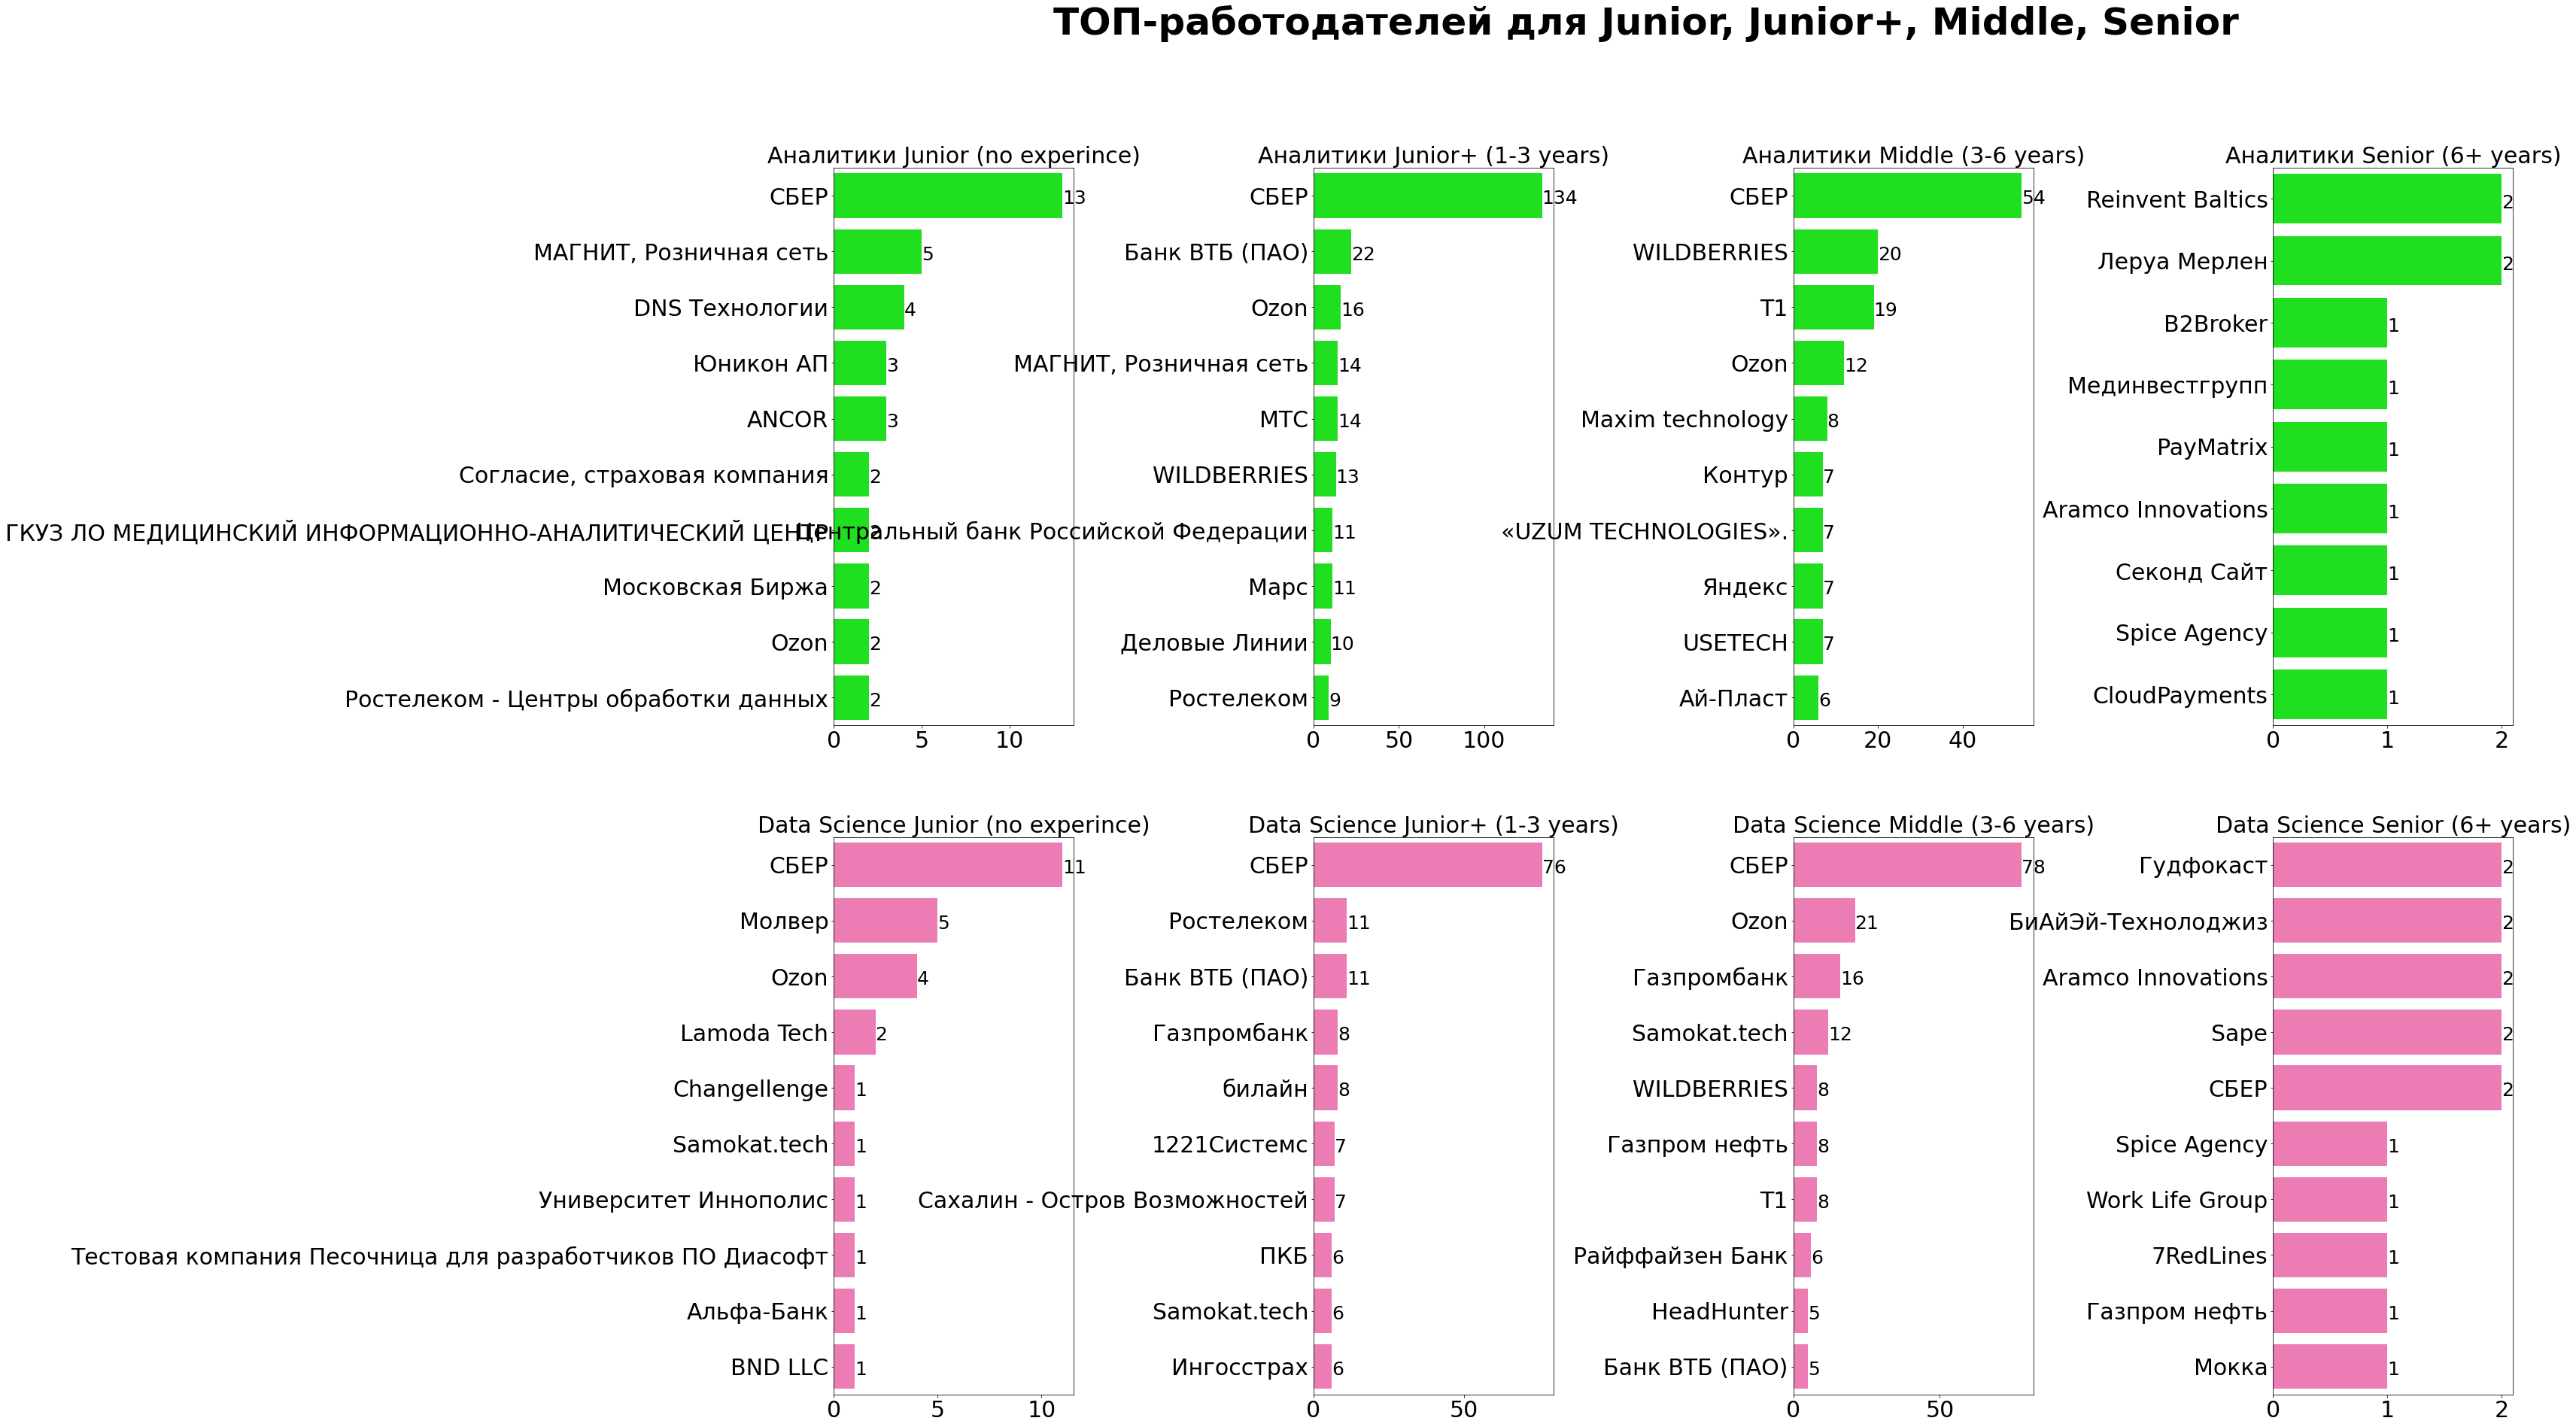

In [50]:
df = analyse
indicator_ = 'employer'
title_ = 'ТОП-работодателей'
tools_grade(df, indicator_, title_)

Лидером по поиску новых сотрудников является СБЕР. Сотрудников совсем без опыта и специалистов с максимальным опытом крупные компании ищут неохотно, предпочитая специалистов от 1 до 6 лет. Показатели по аналитикам данных и специалистам по данным сопоставимы и какие-либо странности или аномалии здесь не наблюдаются. Ну и вопрос - а где же Яндекс?)

*Рассмотрим с точки зрения предлагаемого города работы.*

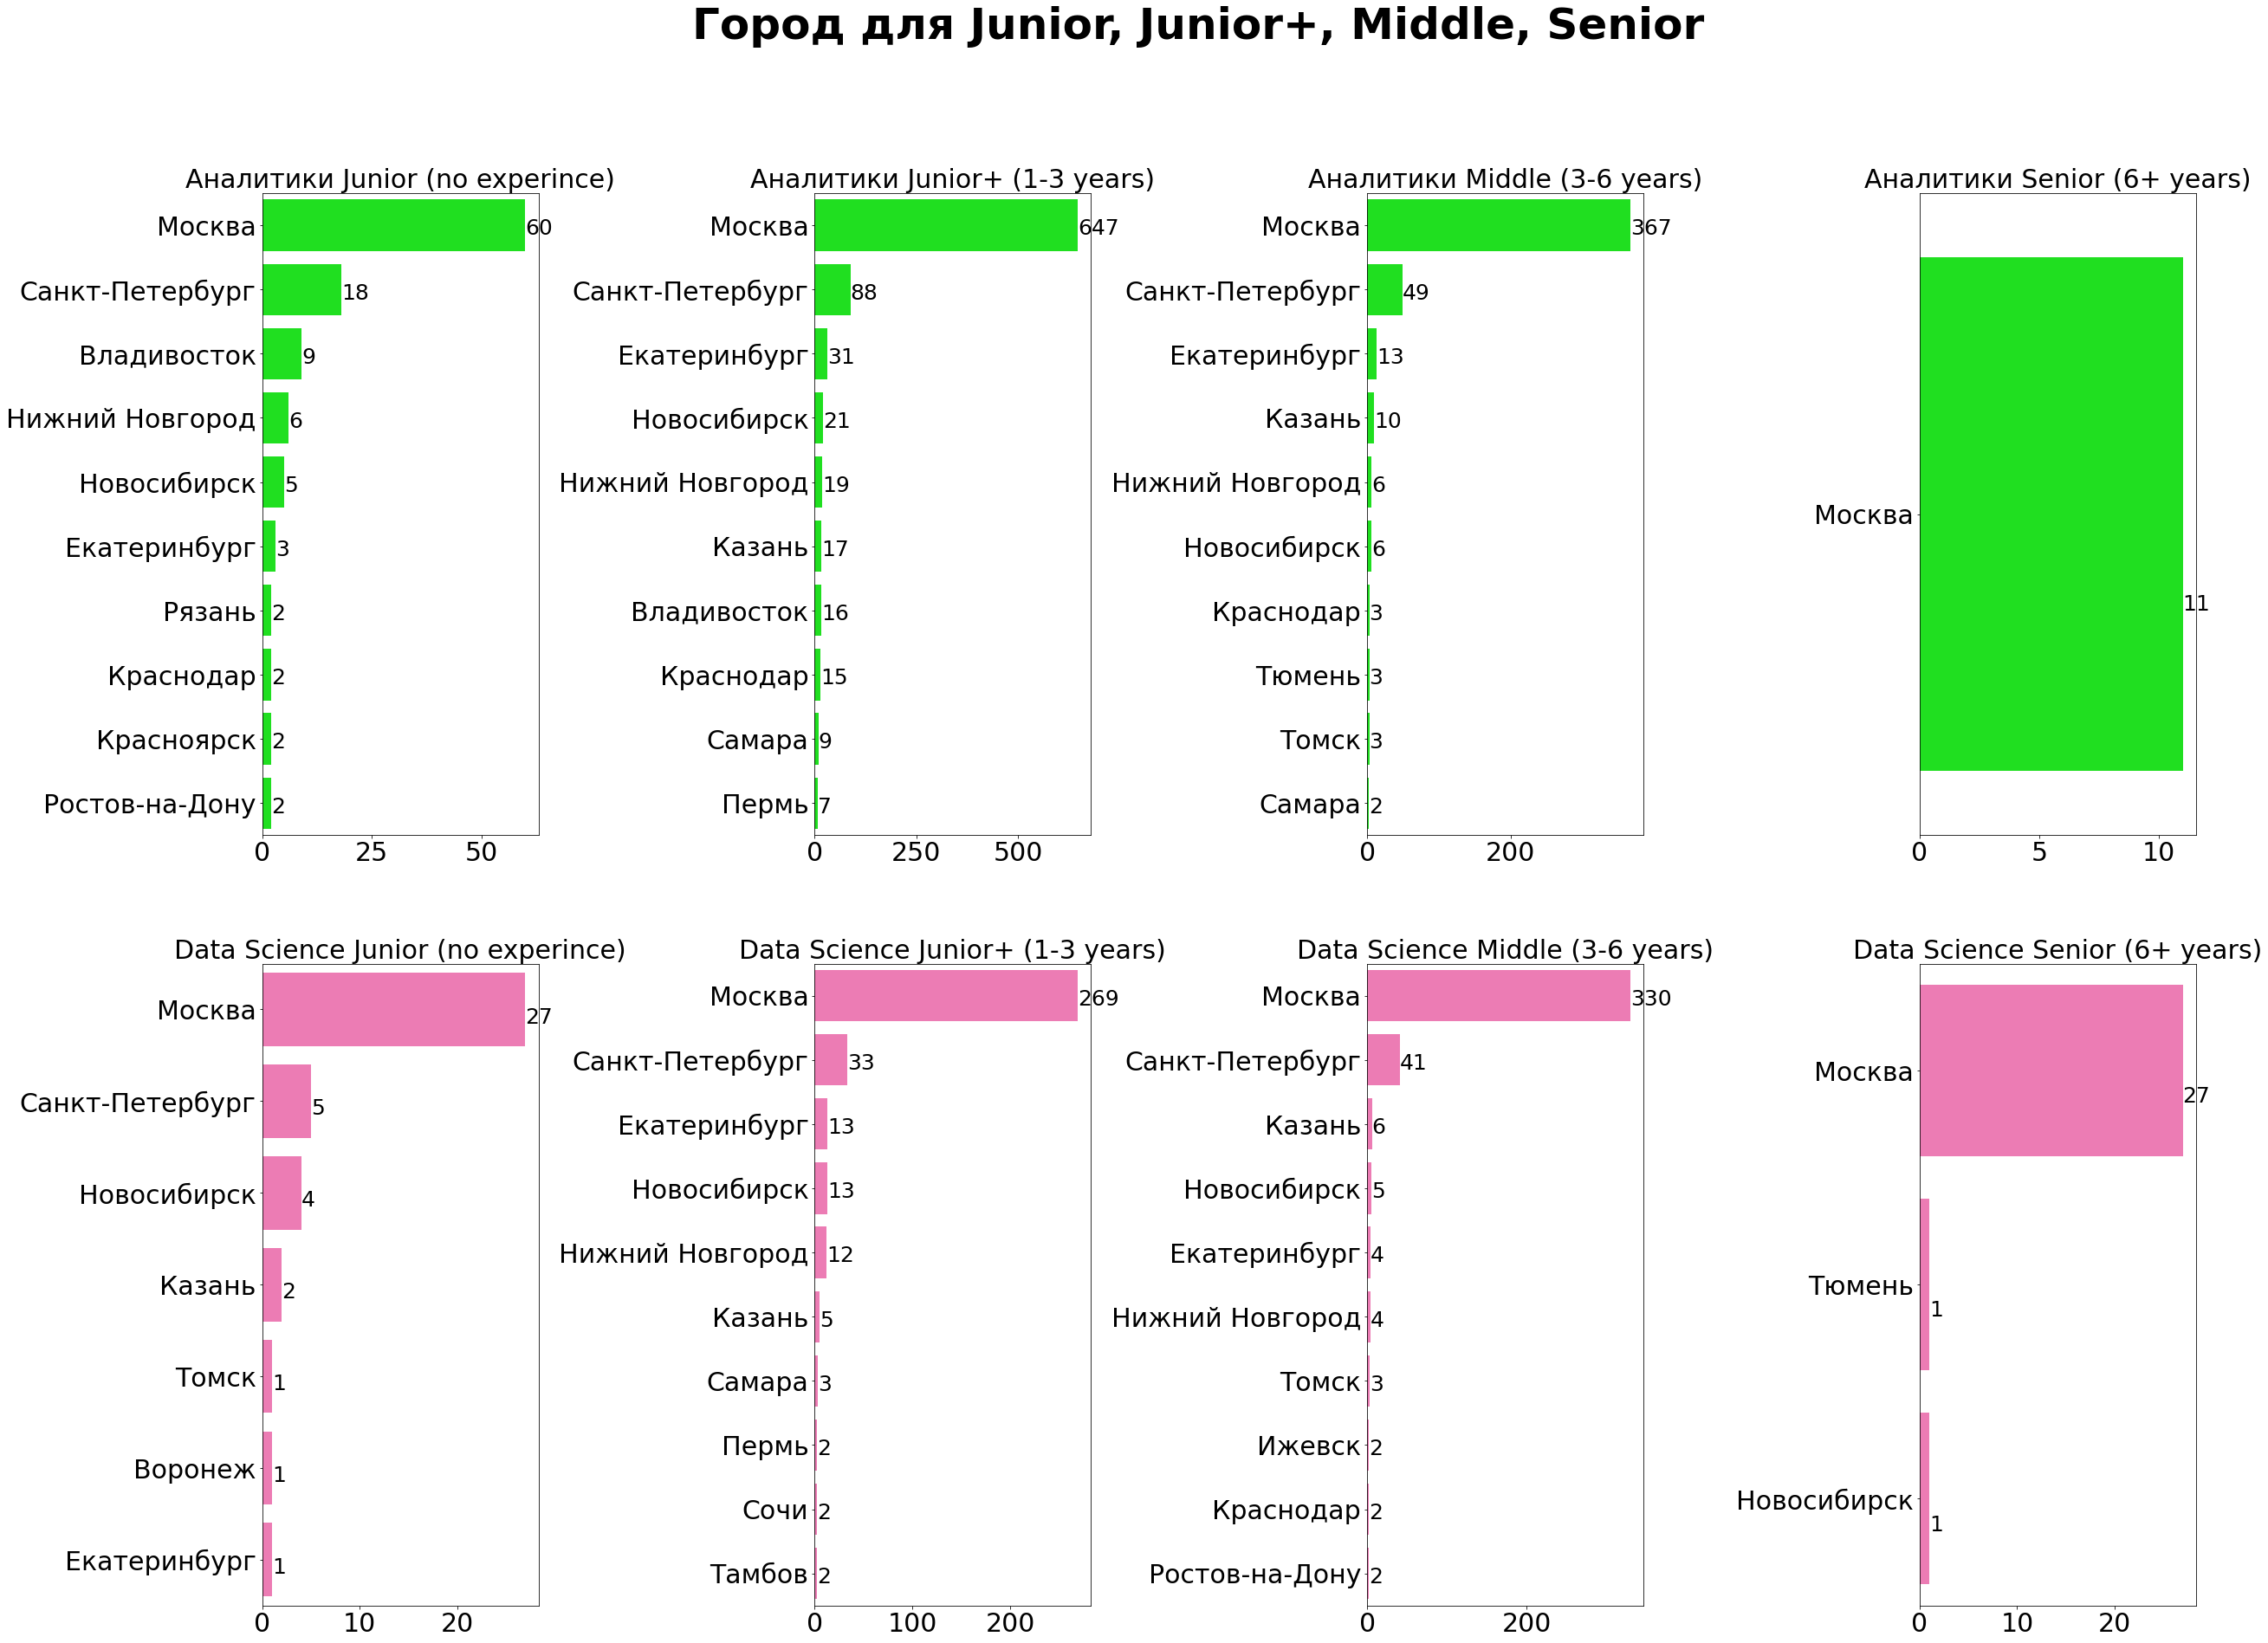

In [51]:
df = analyse
indicator_ = 'area'
title_ = 'Город'
tools_grade(df, indicator_, title_)

Здесь по понятным причинам лидером является Москва второе место занимает Санкт-Петербург, остальные города значительно отстают. Специалисты с большим опытом работы требуются работодателям в Москве.

*Рассмотрим по уровню зарплаты.*

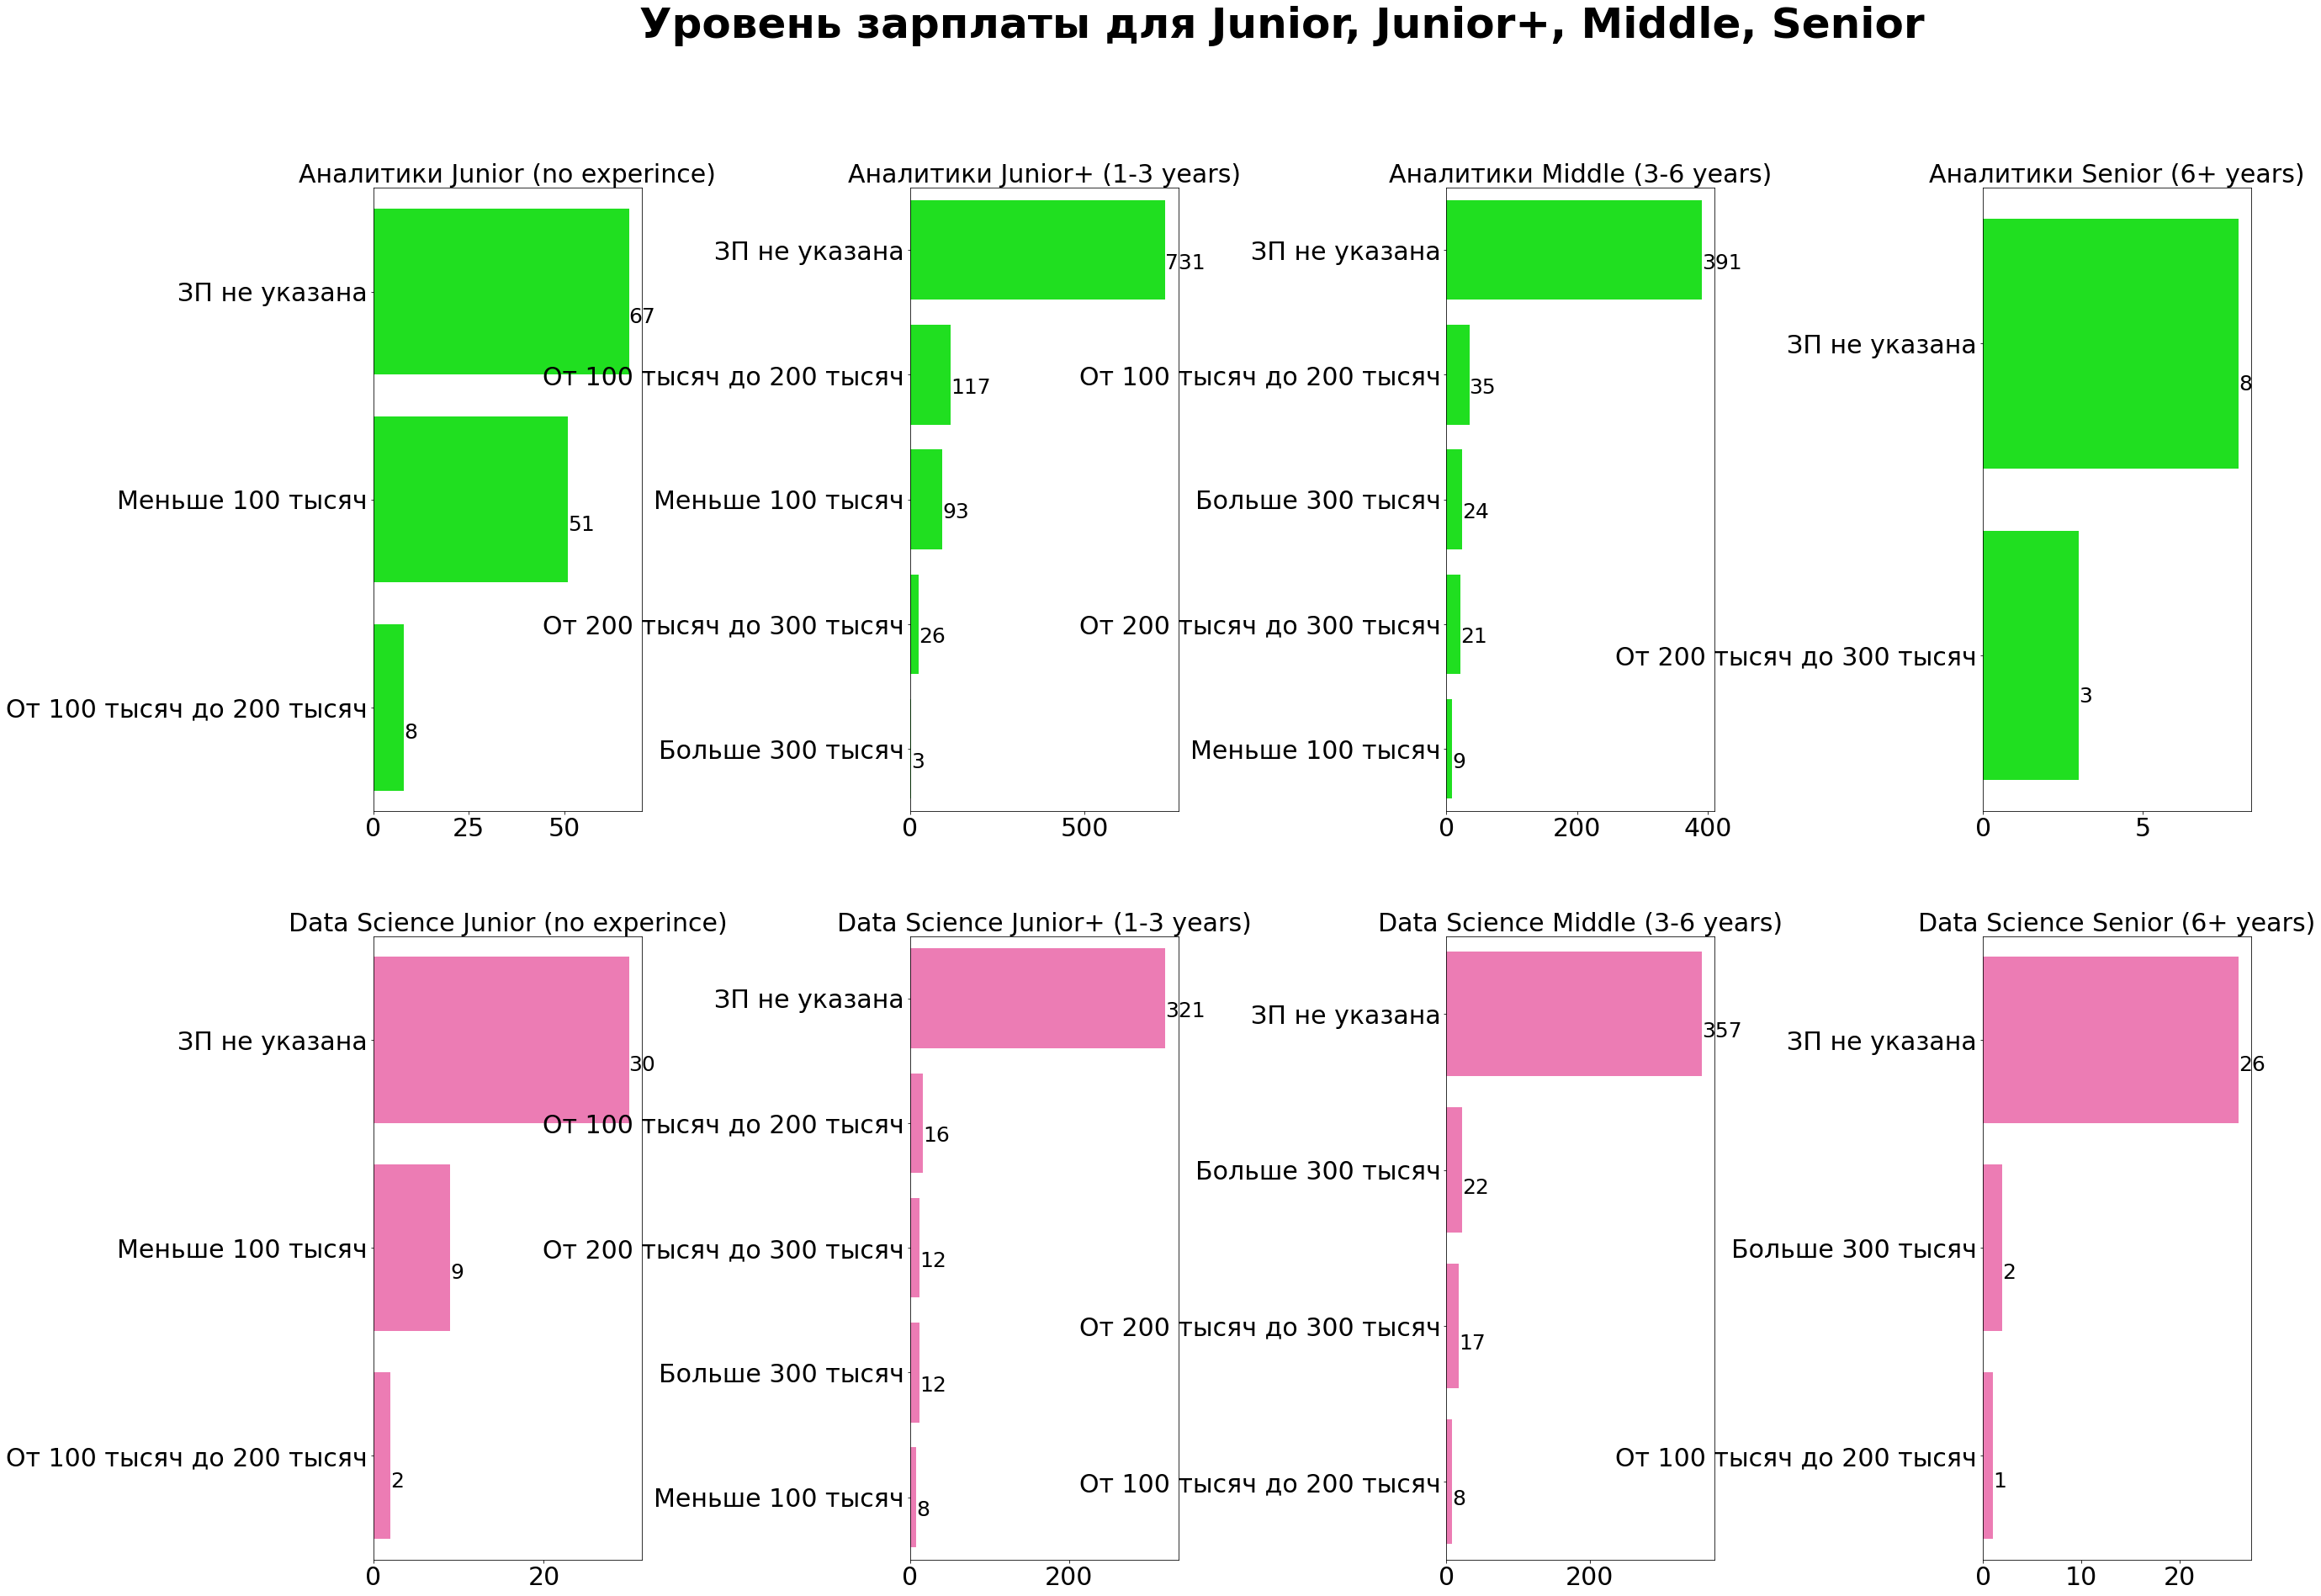

In [52]:
df = analyse
indicator_ = 'salary_bin'
title_ = 'Уровень зарплаты'
tools_grade(df, indicator_, title_)

Чаще всего конечно же зарплата не указывается - это обычное явление для любых объявлений о приеме на работу. При этом для аналитиков данных работодатель чаще указывает уровень зарплаты. Уровень зарплаты до 100 тысяч характерен для специалистов без опыта или 1 - 3 года, для мидлов вилка уже выше - от 100 тысяч, судить об уровне зарплаты самых опытных специалистов по имещимся данным сложно, очень мало объявлений и в почти все без указания уровня зарплаты.

*Рассмотри по типу занятости.*

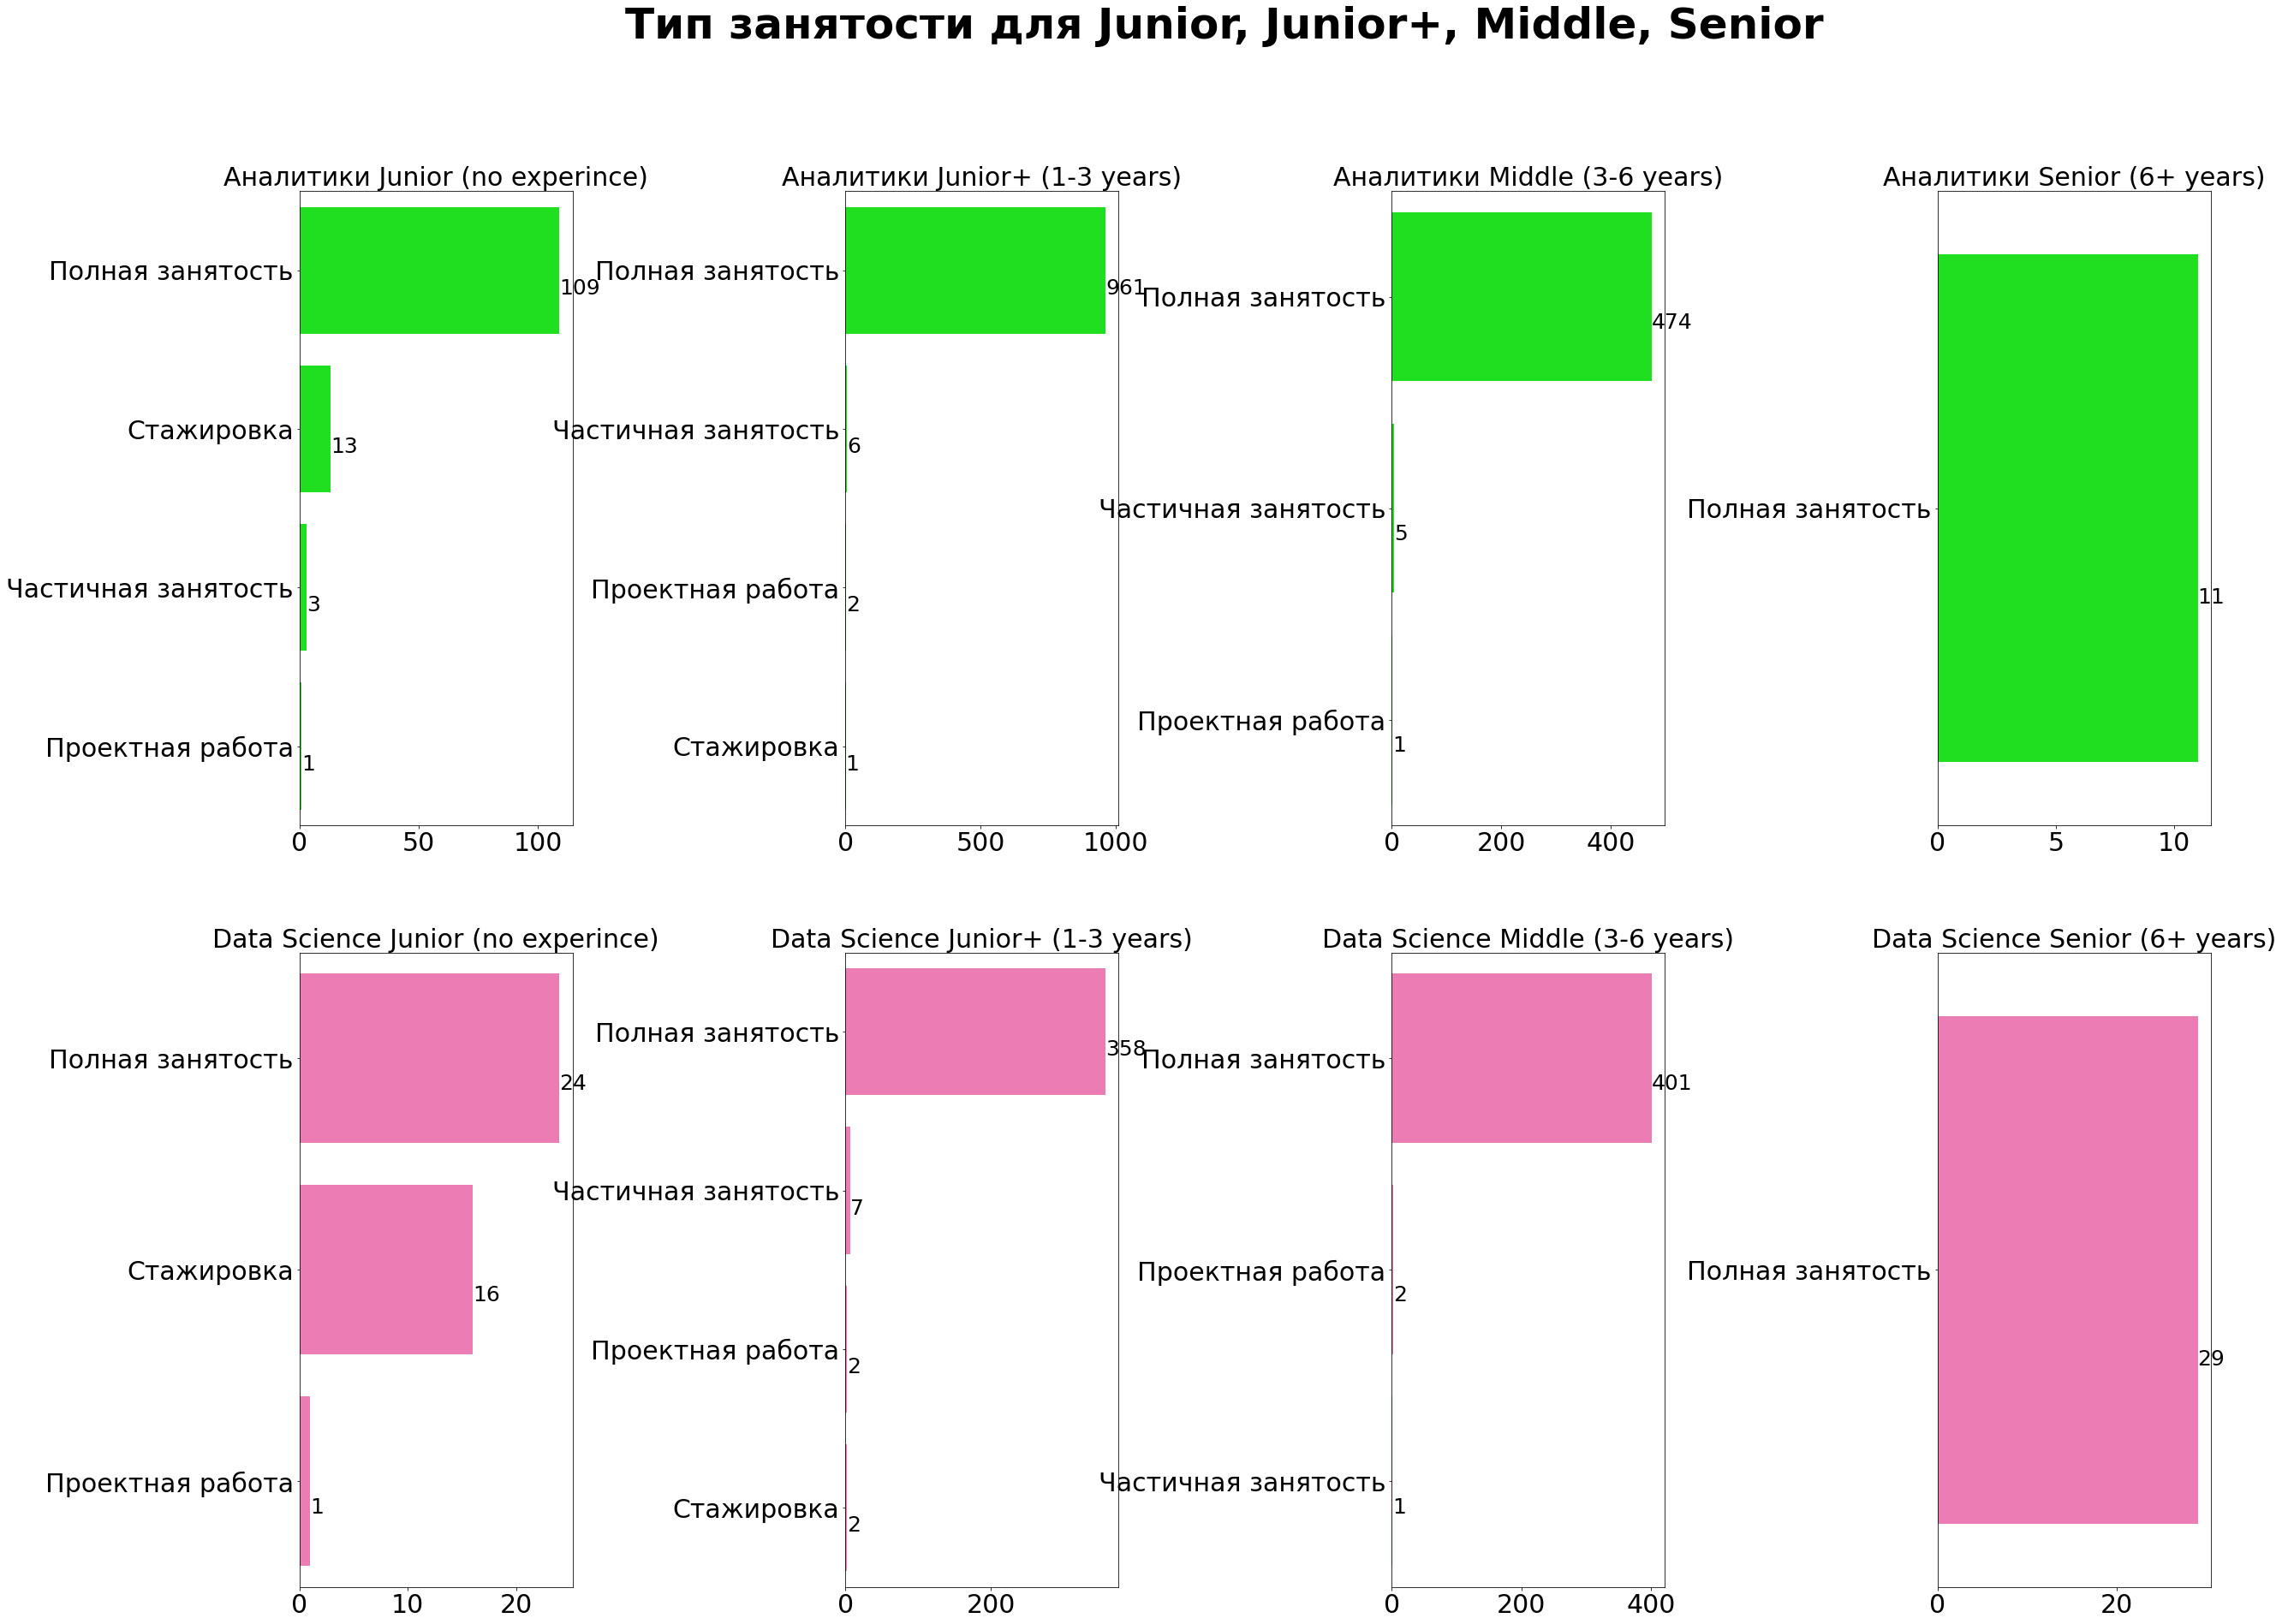

In [53]:
df = analyse
indicator_ = 'employment'
title_ = 'Тип занятости'
tools_grade(df, indicator_, title_)

Работодатель отдает преимущество полной занятости вне зависимости от опыта претендента и типа вакансии.

*Рассмотрим по графику работы.*

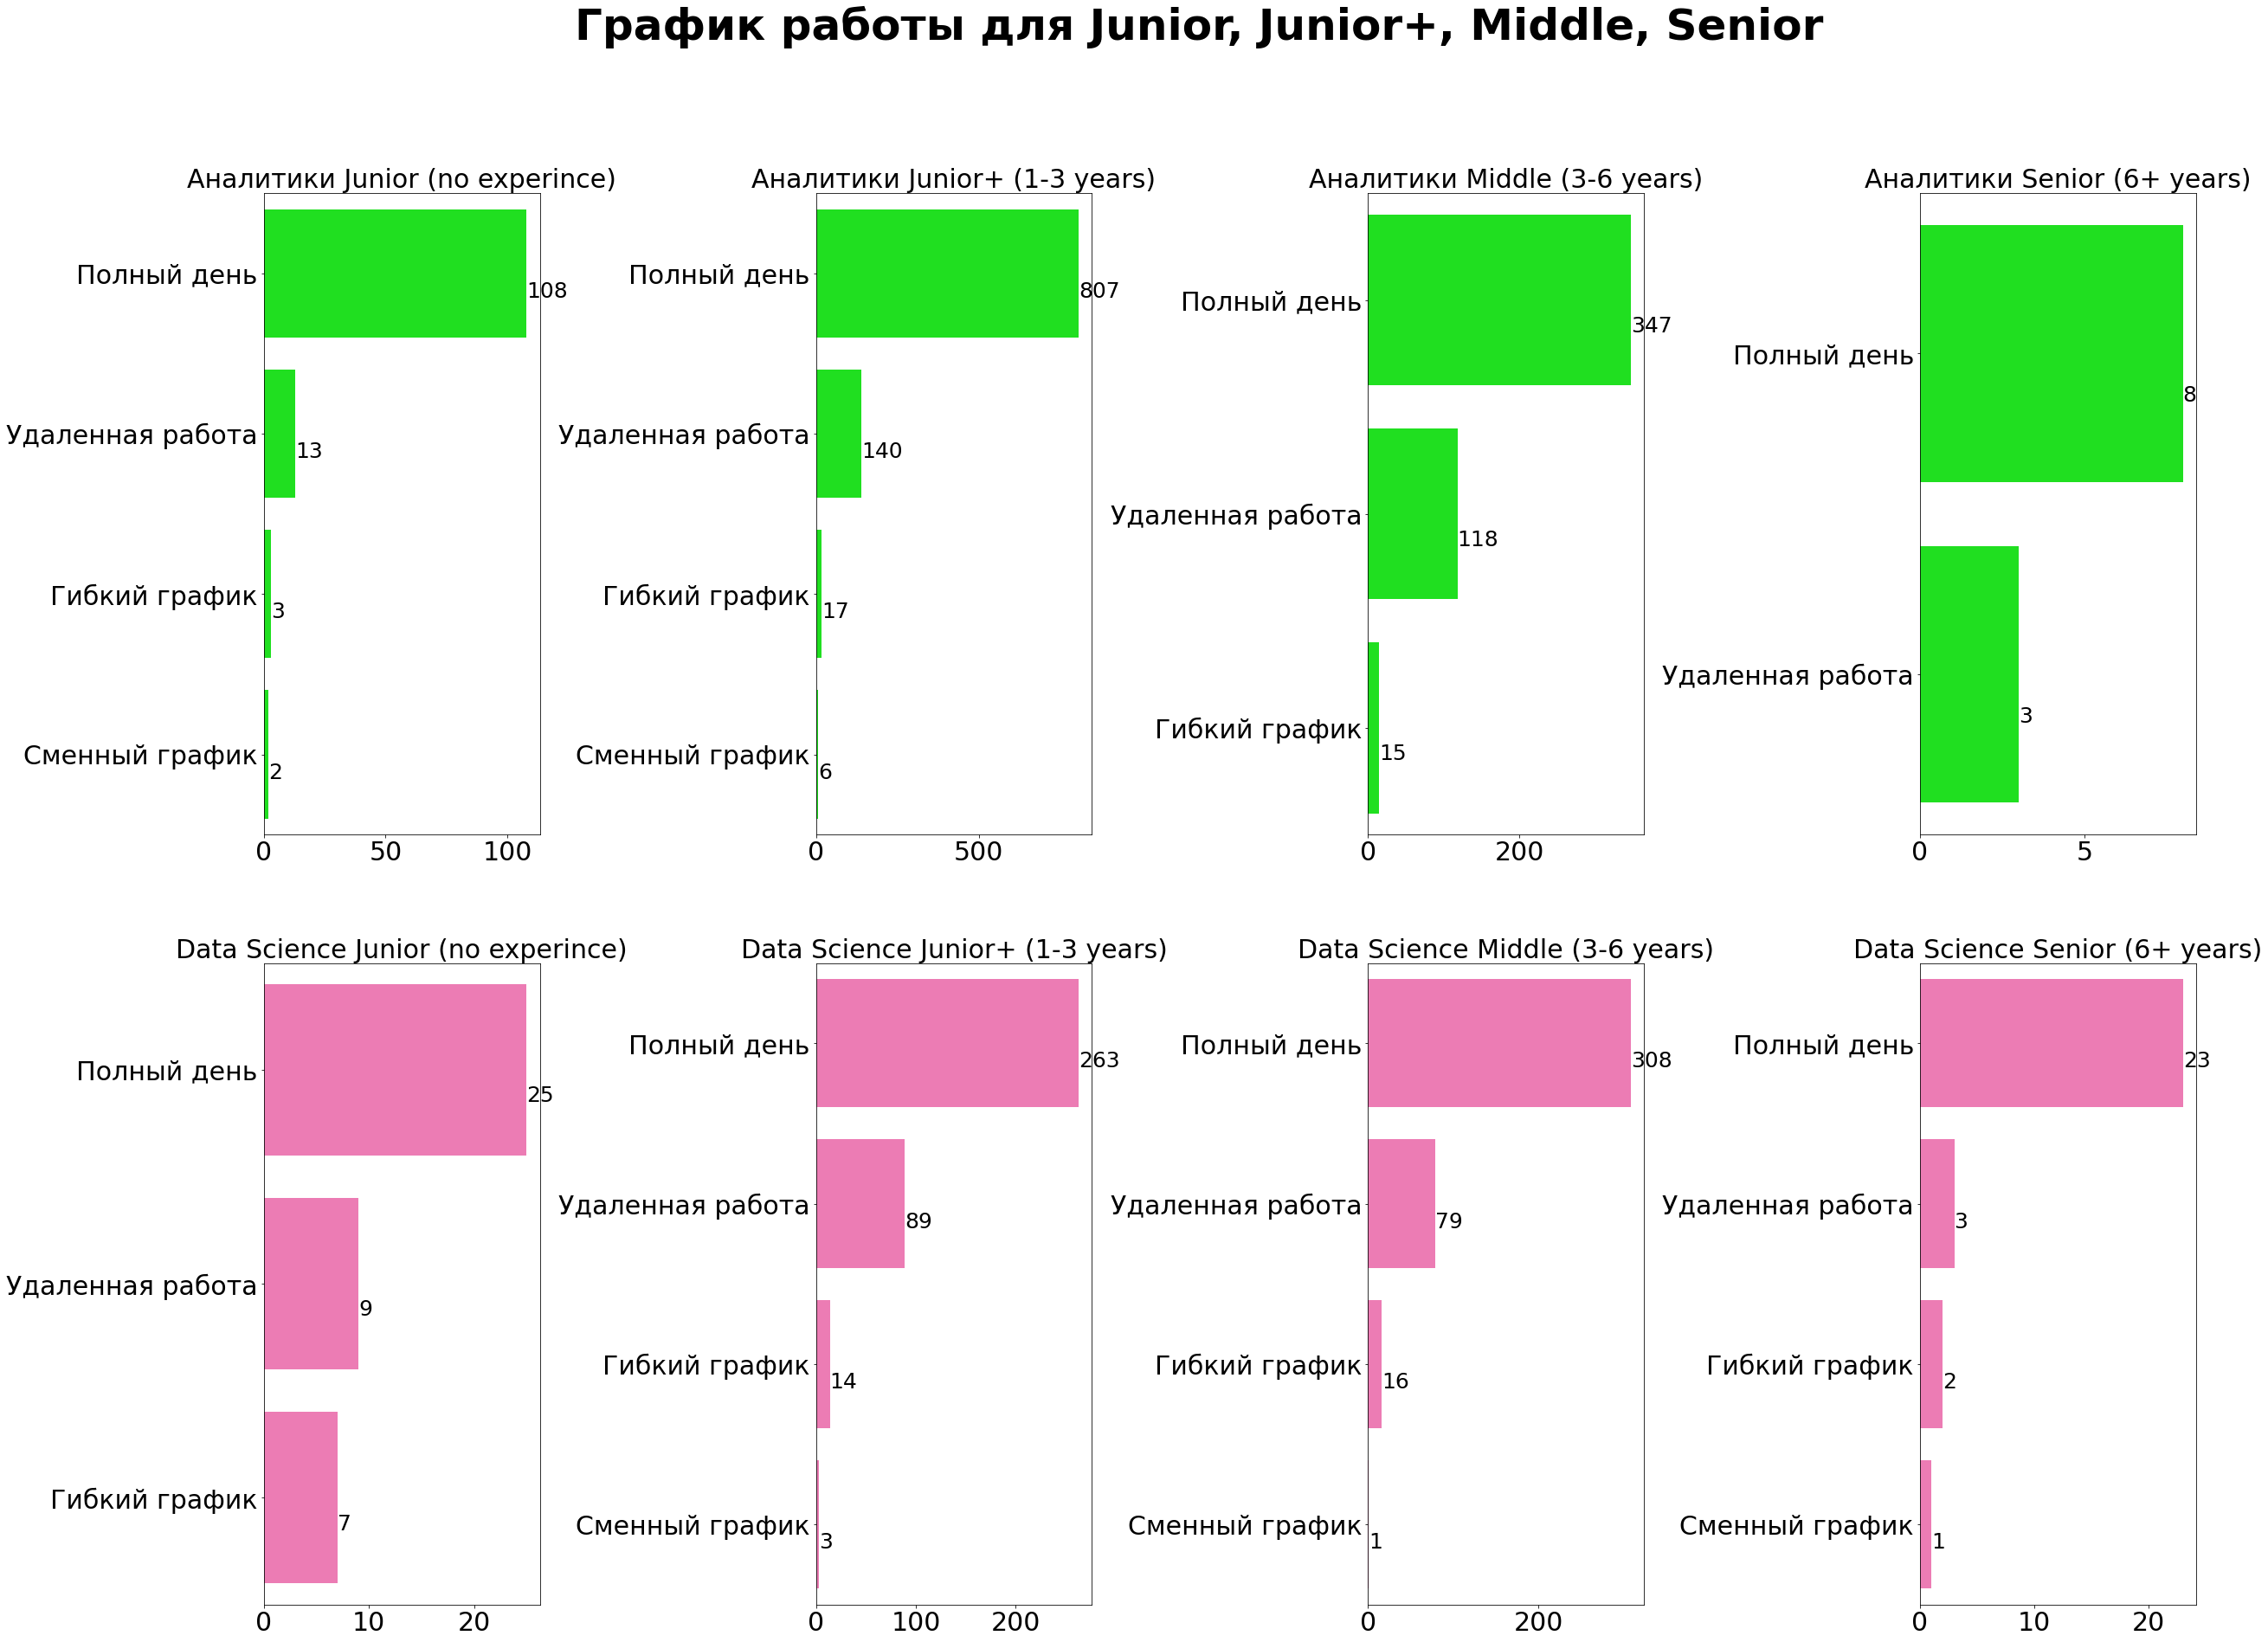

In [54]:
df = analyse
indicator_ = 'schedule'
title_ = 'График работы'
tools_grade(df, indicator_, title_)

Работодатели отдают значительное преимущество работнику с полным рабочим днем. При этом достаточно популярен вариант удаленной работы (но только для специалистов с опытом более 1 года), что также объяснимо мировой мобильностью, доступностью интеренета и минимальными требованиями к рабочему месту работника IT-сферы.

3.4 Определение: какие навыки чаще спрашивают - твердые или мягкие. К какому грейду и к какой специальности требований больше.

*Используя специально сформированную таблицу для работы с навыками, рассмотрим навыки в целом.*

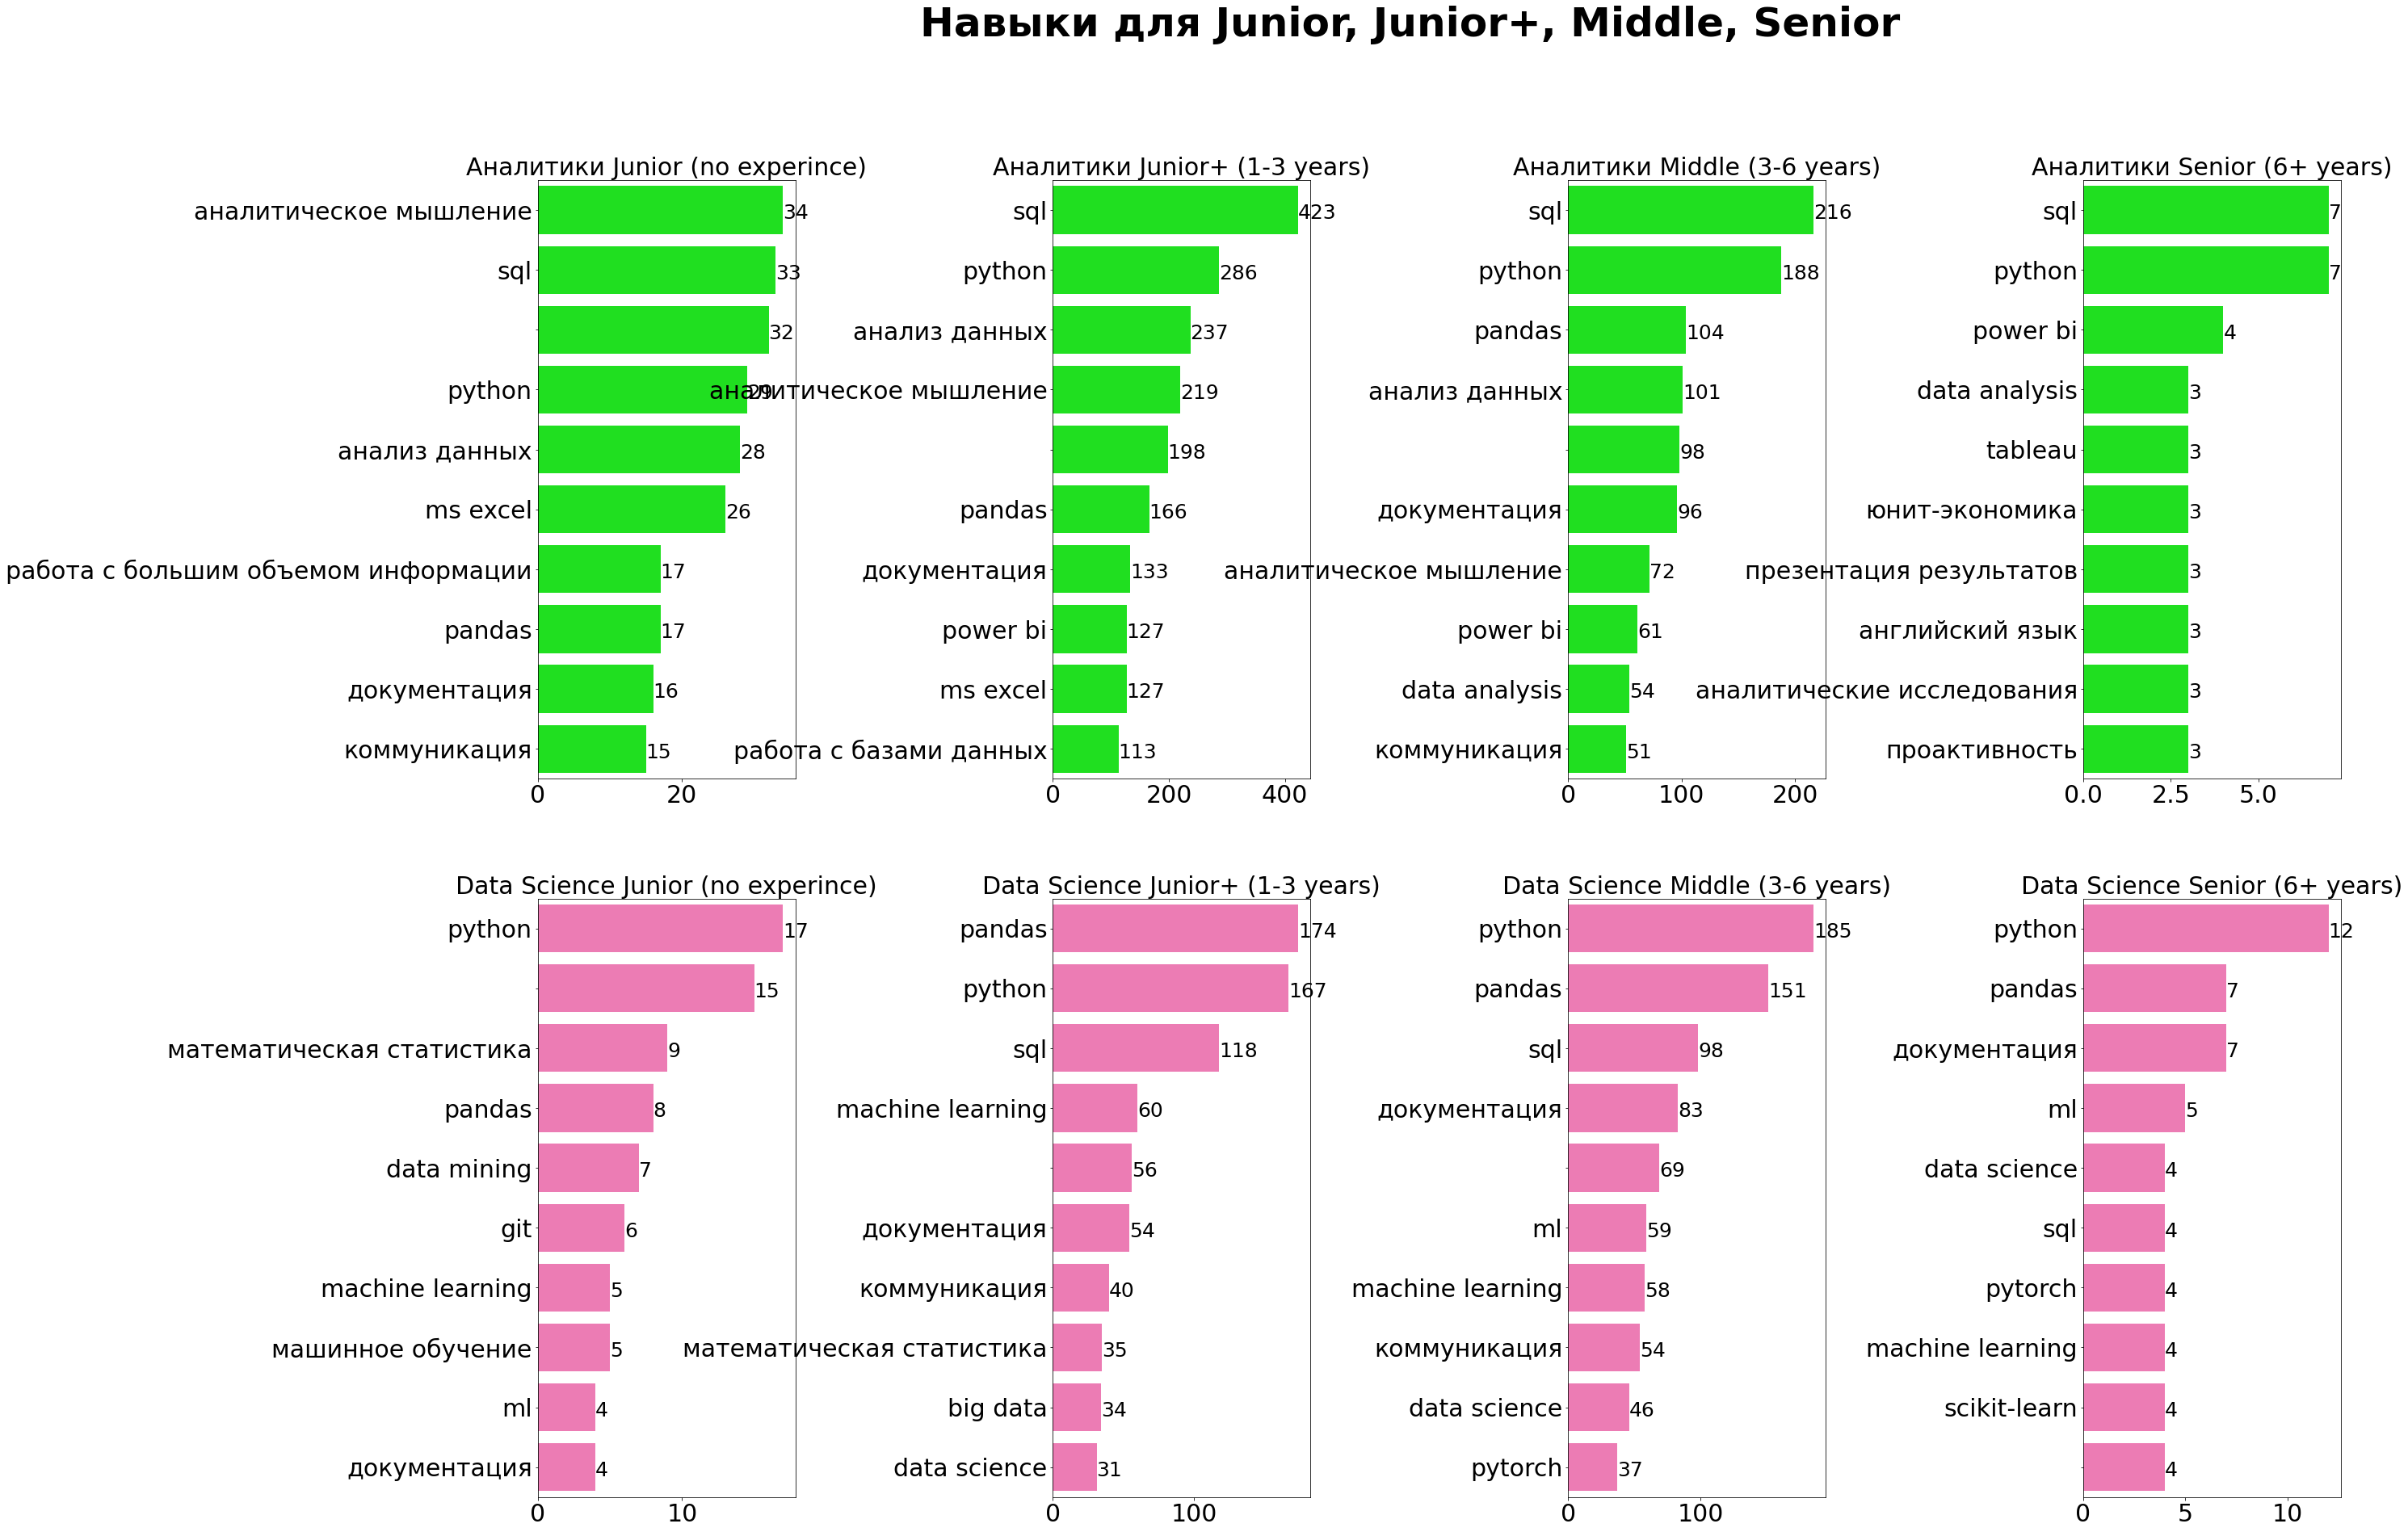

In [55]:
df = df_key
indicator_ = 'key_skills'
title_ = 'Навыки'
tools_grade(df, indicator_, title_)

По набору навыков для аналитиков данных и специалистов по данным лидируют sql, pyhton и pandas. Для аналитиков данных также спрашивают аналитическое мышление и excel, а для специалистов по данным математическую статистику и  машинное обучение. В целом hard навыки работодателя интересуют больше, чем soft. Внутри вакансии в зависимости от грейда нет особо выделяющихся навыков.

3.5. Определение наиболее желаемых кандидатов на вакансии для Аналитика данных и Специалиста по Data Sience по следующим параметрам:
 - самые важные hard-skils,
 - самые важные soft-skils.
 
Ответы дать отдельно для грейдов Junior, Junior+, Middle, Senior.


*Воспользуемся подготовленной таблицей и списком с soft вакансиями. Создадтим отдельные датафреймы с soft навыками и hard навыками.*

In [56]:
df_key_soft = df_key.query('key_skills == @str_soft_skills')
df_key_soft.head(3)

id                     name        published_at  employer  \
3  100046788  Ведущий аналитик данных 2024-05-24 10:28:18  Х5 Group   
4  100056244          Аналитик данных 2024-05-24 11:27:40    ЛУКОЙЛ   
7  100069131            Дата аналитик 2024-05-24 13:05:01      СБЕР   

              area           experience    key_skills     schedule  \
3           Москва  Junior+ (1-3 years)  коммуникация  Полный день   
4           Москва   Middle (3-6 years)  документация  Полный день   
7  Санкт-Петербург  Junior+ (1-3 years)  документация  Полный день   

         employment  salary_from  salary_to     salary_bin name_type  month  
3  Полная занятость          NaN        NaN  ЗП не указана        da      5  
4  Полная занятость          NaN        NaN  ЗП не указана        da      5  
7  Полная занятость          NaN        NaN  ЗП не указана        da      5

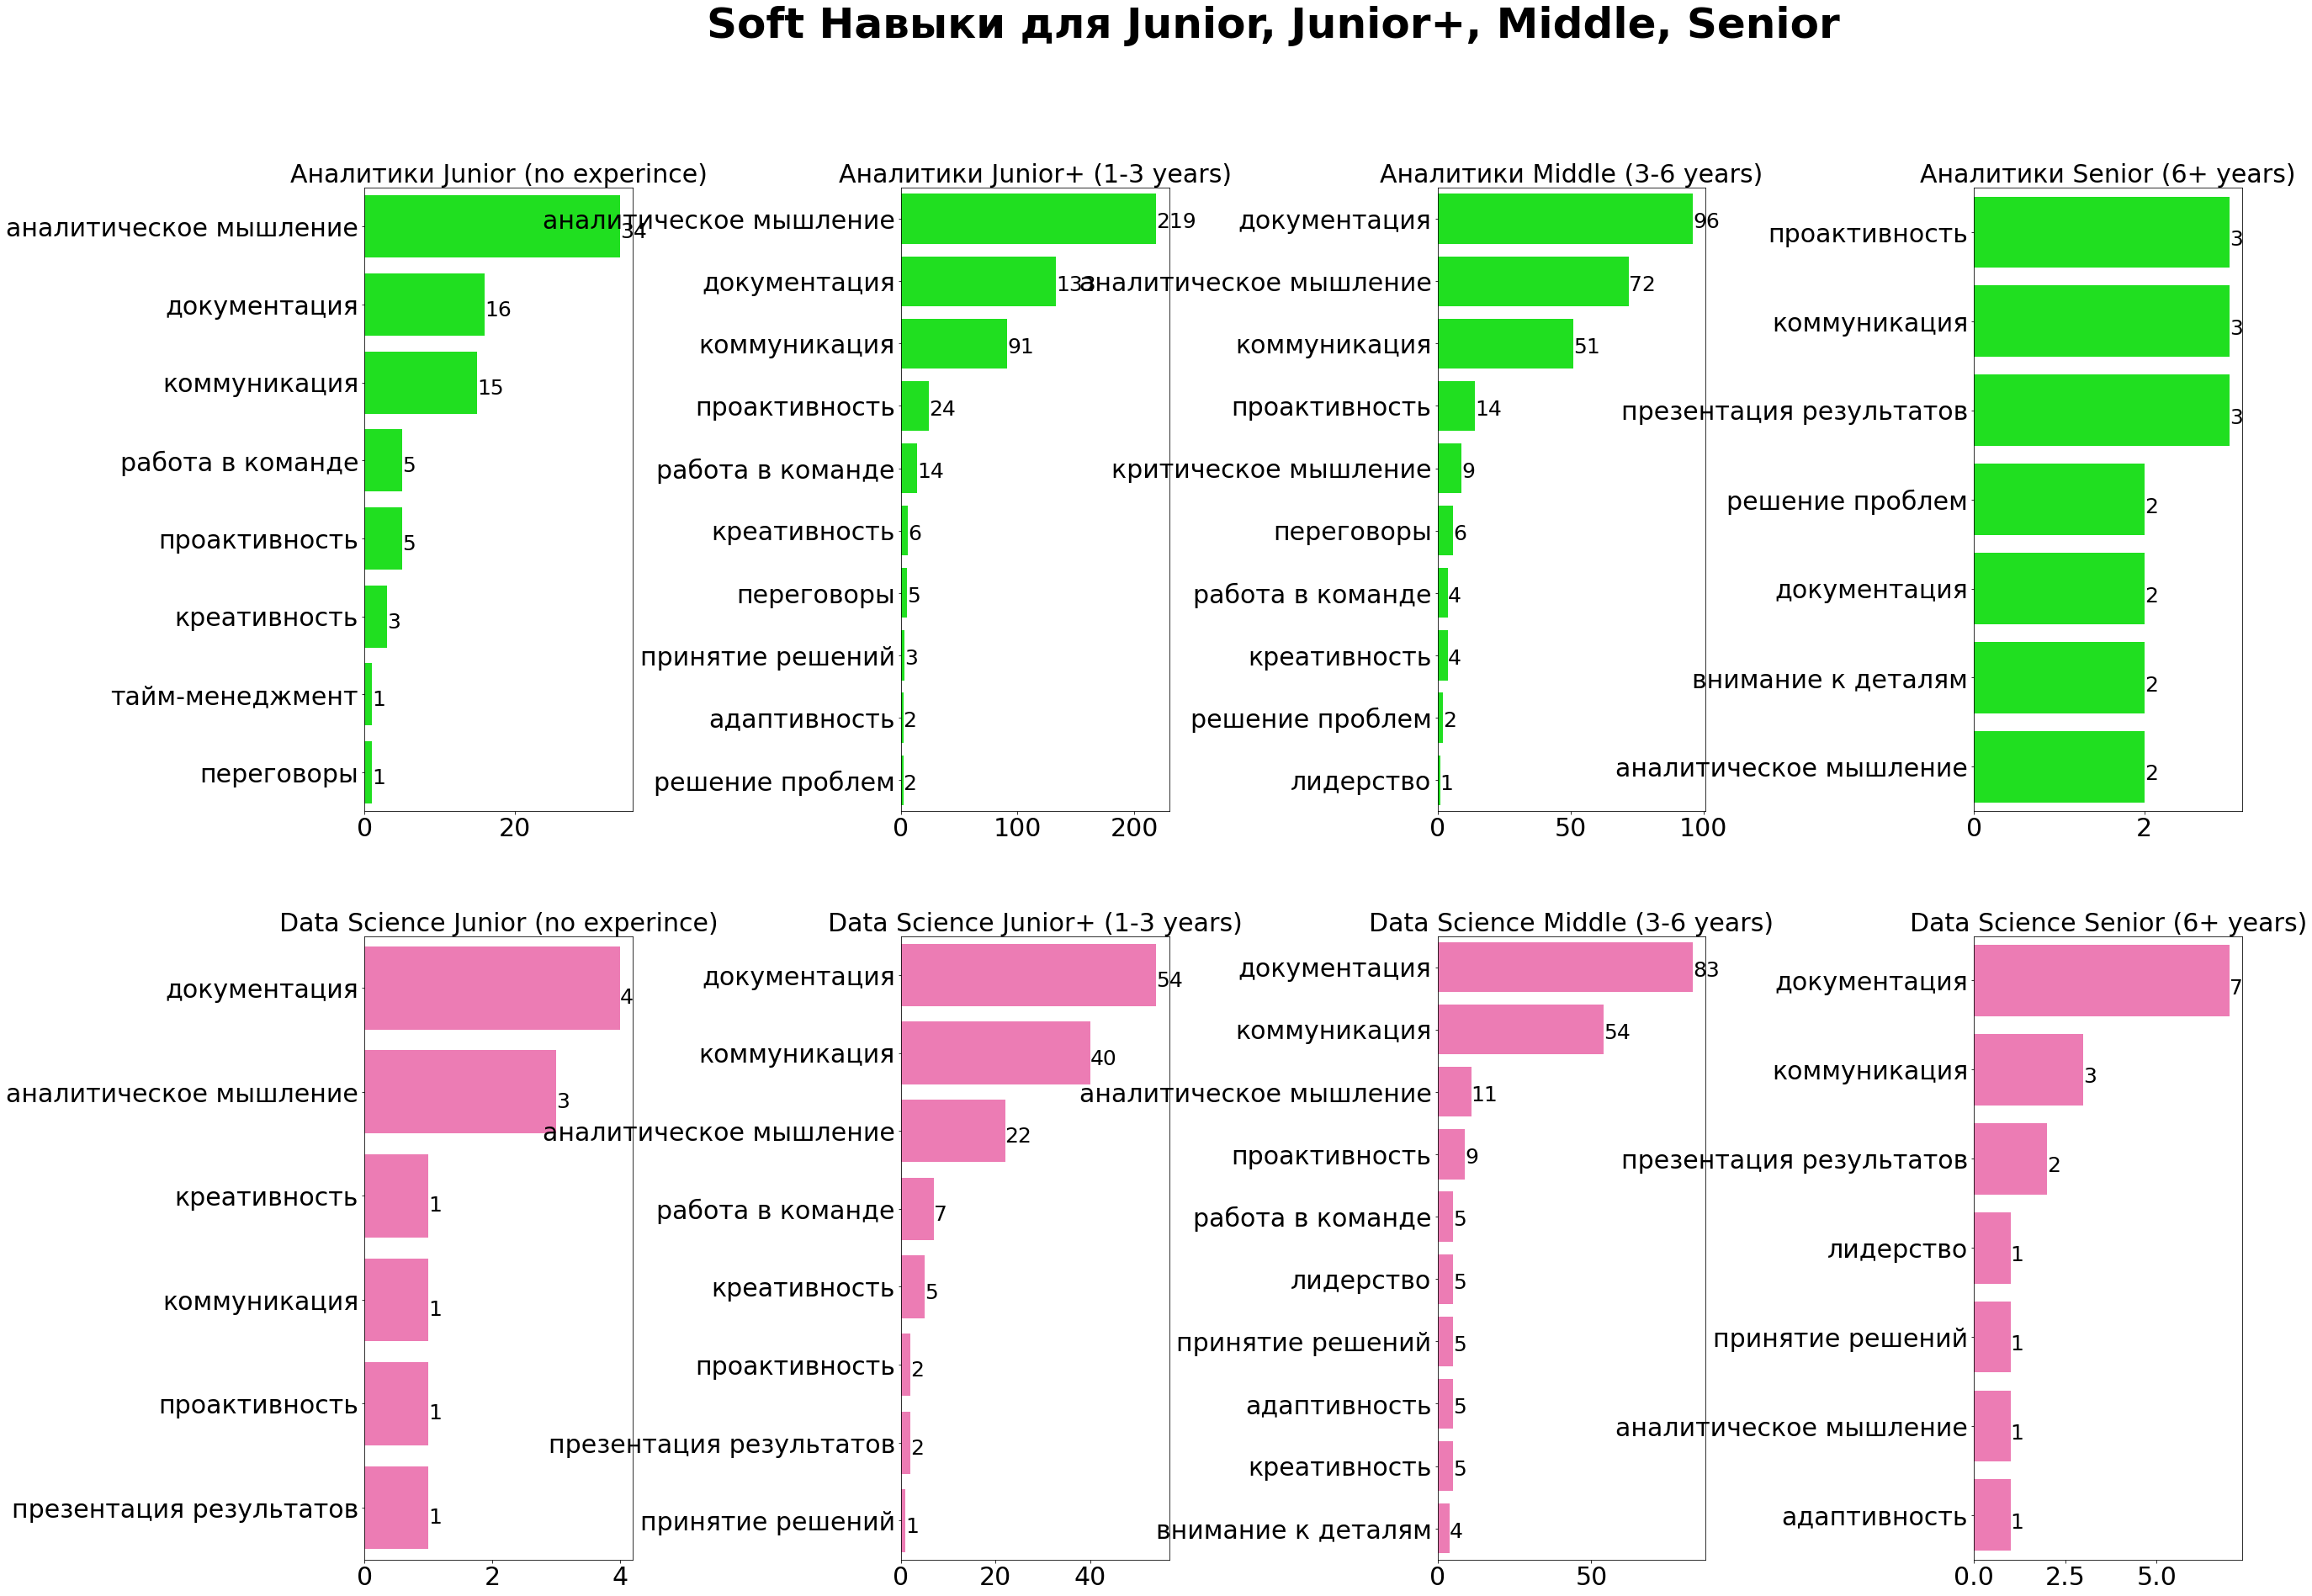

In [57]:
df = df_key_soft
indicator_ = 'key_skills'
title_ = 'Soft Навыки'
tools_grade(df, indicator_, title_)

Для аналитиков данных важно аналитическое мышление, для специалистов по данным навыки работы с документацией. Также в тройке для обеих вакансий коммуникация.

In [58]:
df_key_hard = df_key.query('key_skills != @str_soft_skills')
df_key_hard.head(3)

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   

            employer         area             experience key_skills  \
0  DNS Головной офис  Владивосток  Junior (no experince)   power bi   
0  DNS Головной офис  Владивосток  Junior (no experince)       субд   
0  DNS Головной офис  Владивосток  Junior (no experince)     python   

      schedule        employment  salary_from  salary_to        salary_bin  \
0  Полный день  Полная занятость      60000.0        NaN  Меньше 100 тысяч   
0  Полный день  Полная занятость      60000.0        NaN  Меньше 100 тысяч   
0  Полный день  Полная занятость      60000.0        NaN  Меньше 100 тысяч   

  name_type  month  
0        da      5  
0        da      5  
0        da      5

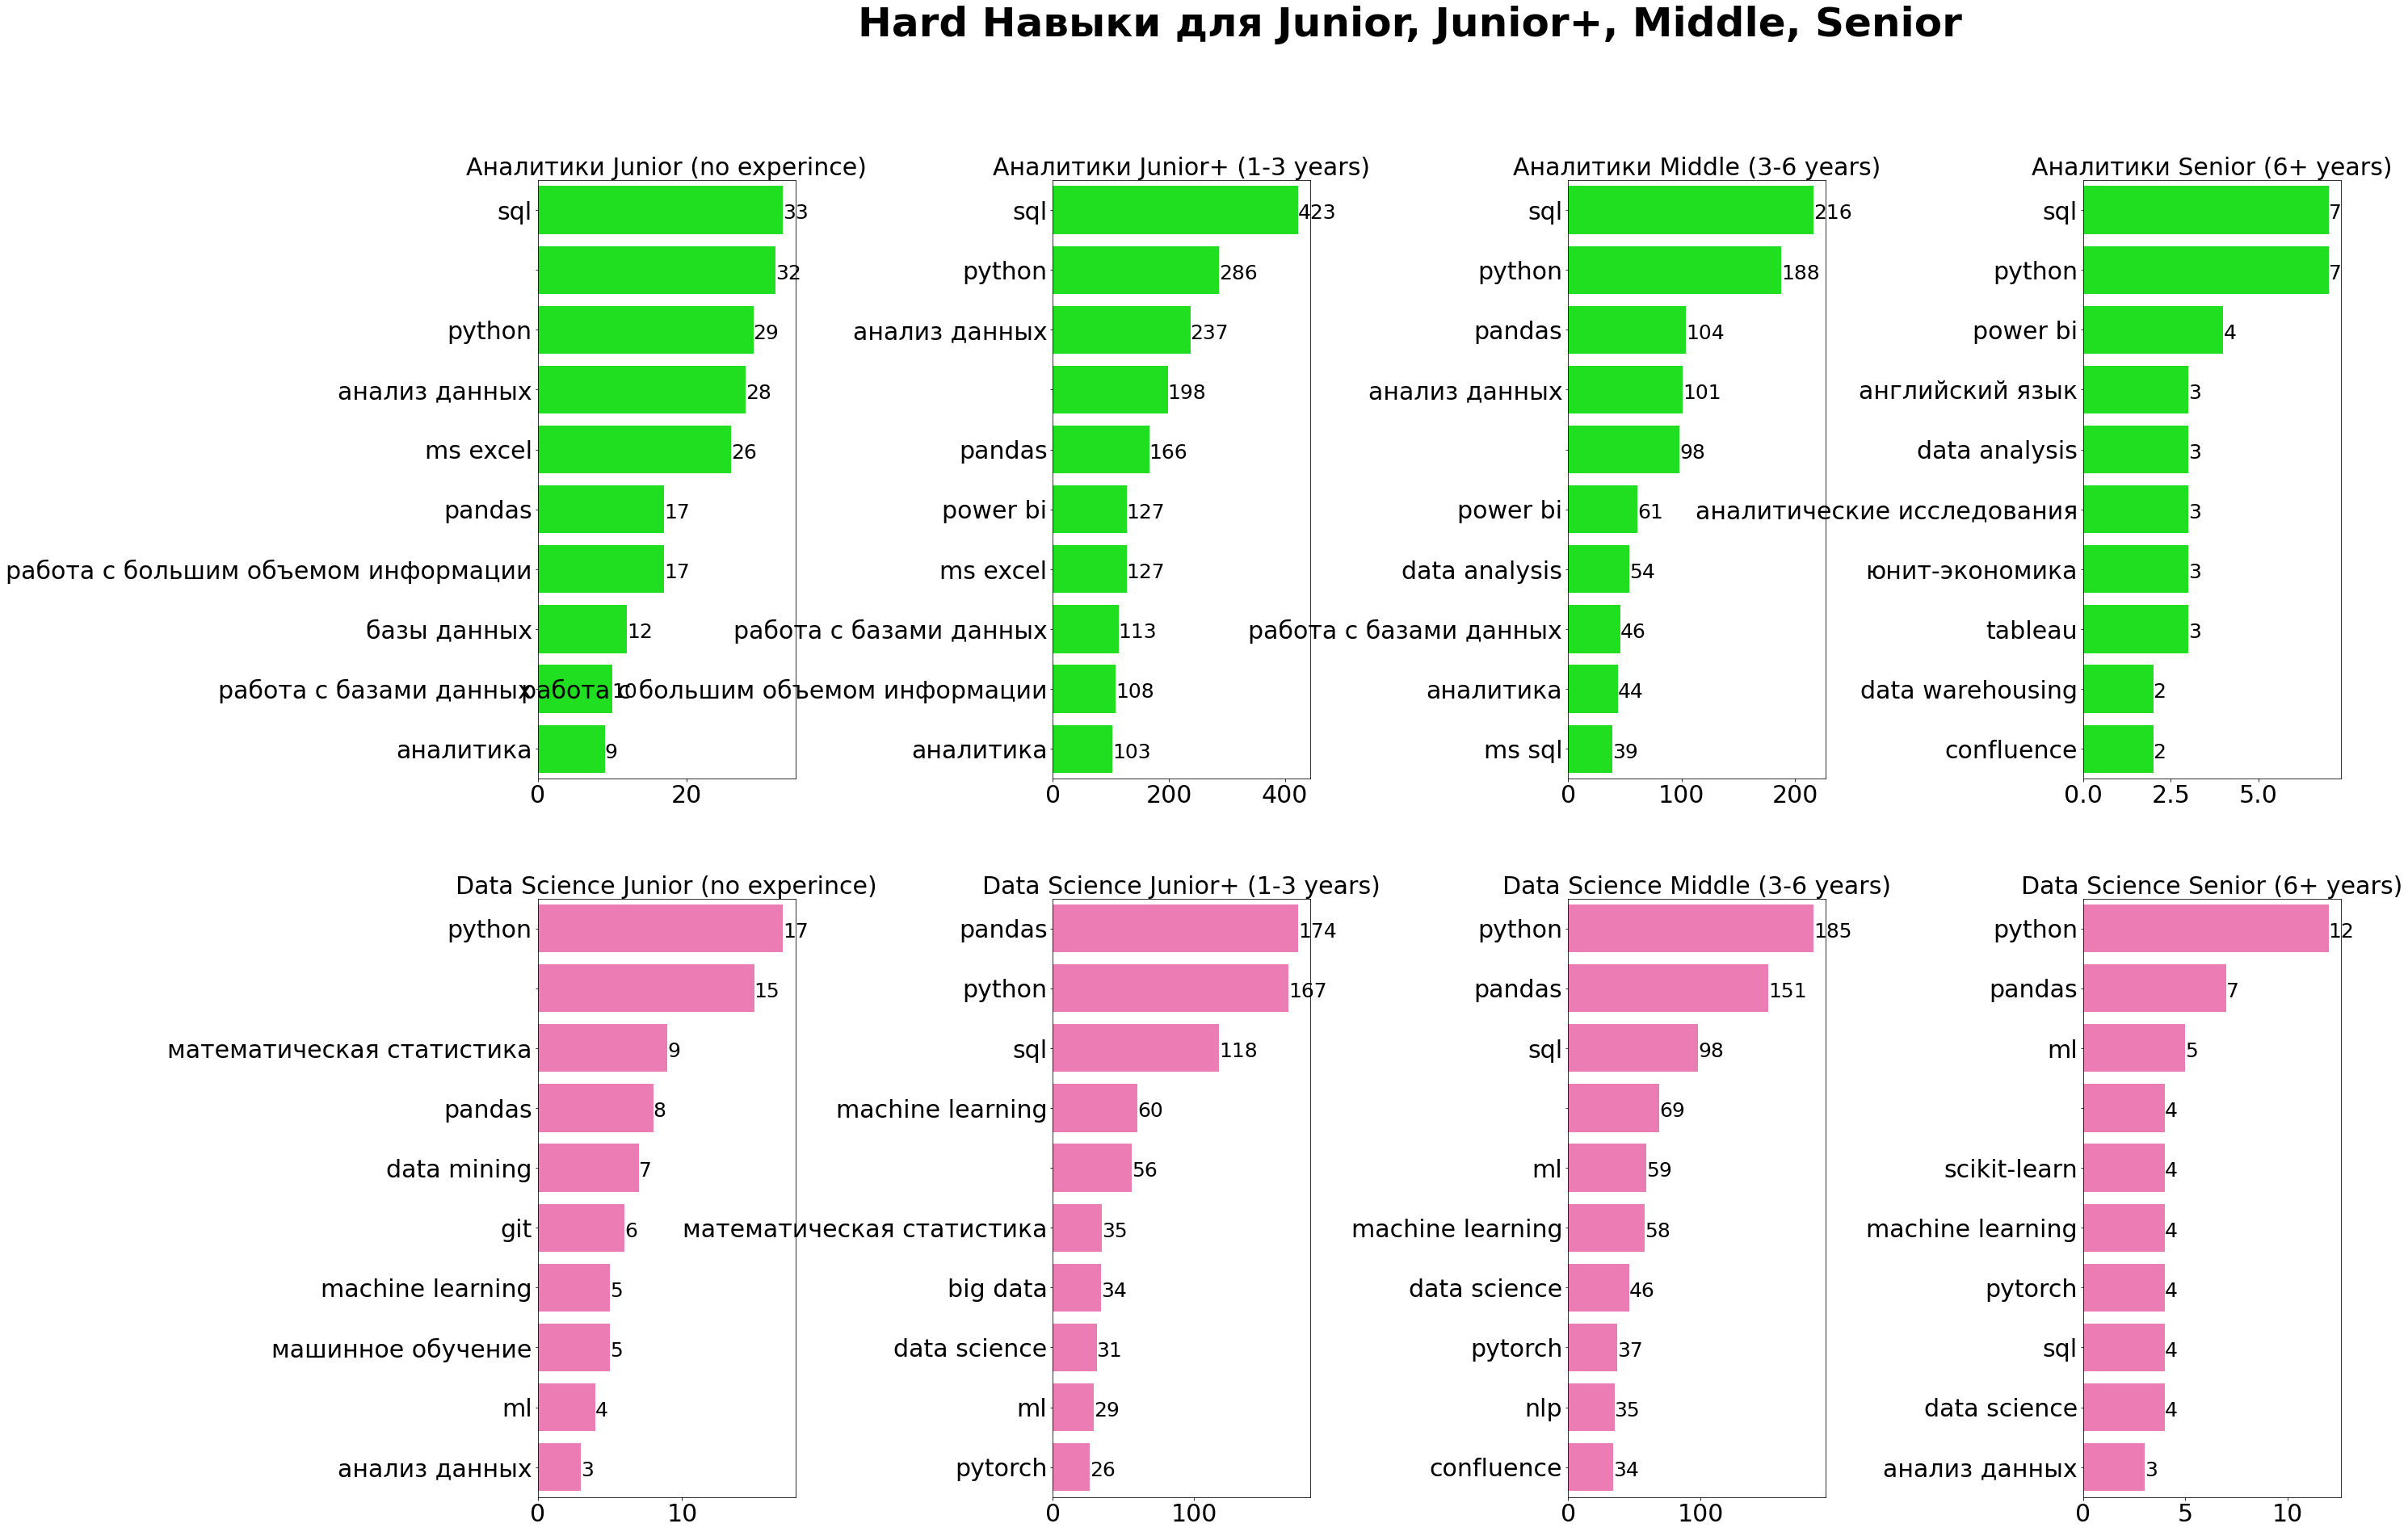

In [59]:
df = df_key_hard
indicator_ = 'key_skills'
title_ = 'Hard Навыки'
tools_grade(df, indicator_, title_)

Среди hard навыков для аналитиков данных и специалистов по данным на первом месте pyhton и sql. В зависимости от грейда требования работодателя меняются не особо.

3.6 Выполнение расчета помесячной динамики количества вакансий для Аналитика данных и Специалиста по Data Sience. Ответы дать отдельно для грейдов Junior, Junior+, Middle, Senior.

In [60]:
vacansy_date = analyse[['id', 'name_type', 'month', 'experience', 'published_at']].sort_values(by='published_at')

vacansy_date

id name_type  month           experience        published_at
468    93170672        da      2   Middle (3-6 years) 2024-02-13 21:45:51
291    94041966        ds      2    Senior (6+ years) 2024-02-29 15:01:35
185    90735443        ds      3  Junior+ (1-3 years) 2024-03-04 17:17:17
298    94225413        ds      3   Middle (3-6 years) 2024-03-04 17:27:08
202    91545479        ds      3   Middle (3-6 years) 2024-03-04 18:10:27
...         ...       ...    ...                  ...                 ...
12    100080002        da      6  Junior+ (1-3 years) 2024-06-11 14:34:15
571    94290887        da      6  Junior+ (1-3 years) 2024-06-11 14:36:37
1579   98824646        da      6   Middle (3-6 years) 2024-06-11 14:47:12
1111   96969442        da      6   Middle (3-6 years) 2024-06-11 14:52:27
338   101746482        da      6   Middle (3-6 years) 2024-06-11 15:07:30

[2430 rows x 5 columns]

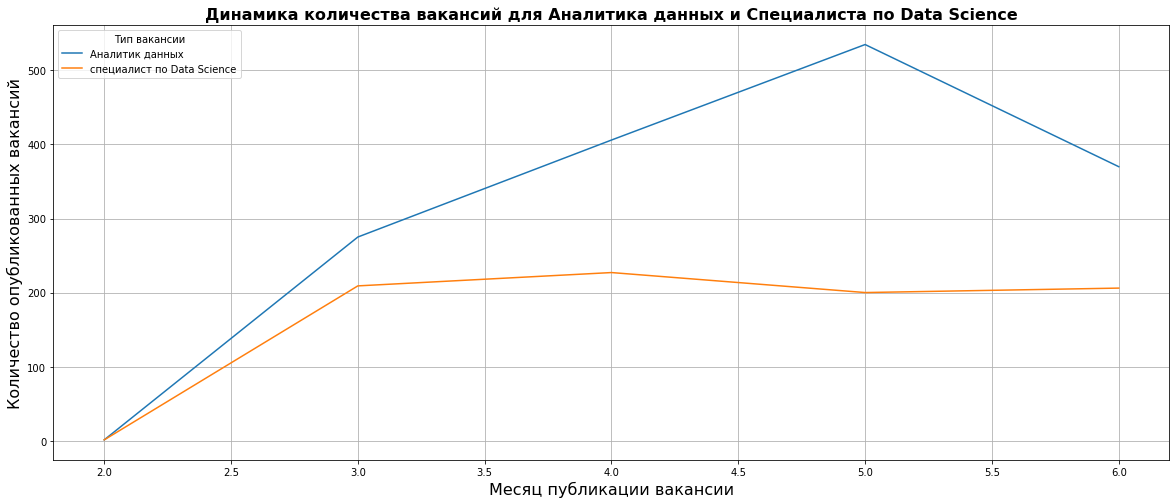

In [61]:
vacansy_date.pivot_table(index='month', columns=['name_type'], values = 'id', aggfunc='count')\
.fillna(0)\
.plot(figsize=(20, 8), style='-', grid=True)

plt.title('Динамика количества вакансий для Аналитика данных и Специалиста по Data Science',
          fontsize=16, fontweight='bold')
plt.xlabel('Месяц публикации вакансии', fontsize=16)
plt.xticks(rotation=0)
plt.ylabel('Количество опубликованных вакансий', fontsize=16)
plt.legend(['Аналитик данных', 'специалист по Data Science'], title='Тип вакансии', loc=2)
plt.show()

In [62]:
vacansy_date_2 = analyse.groupby(['name_type', 'experience', 'month'], 
                                 as_index=False)['id'].agg('count')

vacansy_date_2 = vacansy_date_2.rename(columns={'id':'count'})
vacansy_date_2

name_type             experience  month  count
0         da  Junior (no experince)      3     19
1         da  Junior (no experince)      4     33
2         da  Junior (no experince)      5     41
3         da  Junior (no experince)      6     33
4         da    Junior+ (1-3 years)      3    163
5         da    Junior+ (1-3 years)      4    259
6         da    Junior+ (1-3 years)      5    320
7         da    Junior+ (1-3 years)      6    228
8         da     Middle (3-6 years)      2      1
9         da     Middle (3-6 years)      3     93
10        da     Middle (3-6 years)      4    110
11        da     Middle (3-6 years)      5    169
12        da     Middle (3-6 years)      6    107
13        da      Senior (6+ years)      4      4
14        da      Senior (6+ years)      5      5
15        da      Senior (6+ years)      6      2
16        ds  Junior (no experince)      3     13
17        ds  Junior (no experince)      4      8
18        ds  Junior (no experince)      5     13
19        ds  Junior (no experince)      6      7
20        ds    Junior+ (1-3 years)      3     92
21        ds    Junior+ (1-3 years)      4    104
22        ds    Junior+ (1-3 years)      5     78
23        ds    Junior+ (1-3 years)      6     95
24        ds     Middle (3-6 years)      3     98
25        ds     Middle (3-6 years)      4    104
26        ds     Middle (3-6 years)      5    103
27        ds     Middle (3-6 years)      6     99
28        ds      Senior (6+ years)      2      1
29        ds      Senior (6+ years)      3      6
30        ds      Senior (6+ years)      4     11
31        ds      Senior (6+ years)      5      6
32        ds      Senior (6+ years)      6      5

In [63]:
fig = px.bar(vacansy_date_2.sort_values(by='count', ascending=False), # загружаем данные и заново их сортируем
             x='month', # указываем столбец с данными для оси X
             y='count', # указываем столбец с данными для оси Y
             template = 'ggplot2',
             color='experience',
             pattern_shape='name_type',
             pattern_shape_sequence=['x', '.'],
             barmode='overlay')
# оформляем график
fig.update_layout(title='Количество публикаций объявлений в день',
                   xaxis_title='Месяц публикации вакансии',
                   yaxis_title='Кол-во объявлений',
                 width=1000, # указываем размеры графика
                  height=1000,
                 )
fig.show() # выводим график

Для аналитиков данных видно стабильный рост числа публикаций, начиная с ферваля и до мая. в мае получен максимум, к июню число публикаций уменьшается. Специалисты по данным, начиная с марта, востребованы гораздо меньше. При этом наиболее  востребованы специалисты с опытом 1 - 6 лет, все с тем же пиком в мае.

3.7 Анализ наличия вакансий для специалистов без опыта работы с совмещением с основной рабочей деятельностью и анализ требований к таких кадидатам.

*Рассмотрим - существуют ли вакансии для специалистов с нулевым опытом, которые планируют совмещение новой профессии без отрыва от основной рабочей деятельности.*

In [64]:
analyse.head(1)

id                                    name        published_at  \
0  100039284  Junior аналитик данных (исследователь) 2024-05-24 09:37:04   

            employer         area             experience  \
0  DNS Головной офис  Владивосток  Junior (no experince)   

                                   key_skills     schedule        employment  \
0  [['Power BI',  'СУБД',  'Python',  'SQL']]  Полный день  Полная занятость   

   salary_from  salary_to        salary_bin name_type  month  
0      60000.0        NaN  Меньше 100 тысяч        da      5

In [65]:
analyse_junior_no = analyse.loc[analyse['experience']=='Junior (no experince)']
analyse_junior_no = analyse_junior_no.loc[analyse_junior_no['employment'] !='Полная занятость']
analyse_junior_no = analyse_junior_no.loc[analyse_junior_no['schedule']=='Удаленная работа']
analyse_junior_no_da = analyse_junior_no.loc[analyse_junior_no['name_type']== 'da']
analyse_junior_no_ds = analyse_junior_no.loc[analyse_junior_no['name_type']== 'ds']
analyse_junior_no_da.head()

id                                      name        published_at  \
112   100602374                  Стажер - Аналитик данных 2024-05-29 13:10:51   
152   100768779  Аналитик данных (специалист по power BI) 2024-05-31 02:50:04   
293   101516298                      Стажер Дата Аналитик 2024-06-10 16:06:06   
1587   98869956                       Junior Data Analyst 2024-06-10 03:29:33   

       employer             area             experience  \
112        Эр-1           Москва  Junior (no experince)   
152      Акцент      Владивосток  Junior (no experince)   
293   Автомакон           Москва  Junior (no experince)   
1587  BlockShop  Санкт-Петербург  Junior (no experince)   

                                             key_skills          schedule  \
112   [['Коммуникация',  'SQL',  'Python',  'pandas'...  Удаленная работа   
152                                                [[]]  Удаленная работа   
293   [['Проактивность',  'Документация',  'Pandas',...  Удаленная работа   
1587  [['Английский язык',  'Анализ данных',  'Proje...  Удаленная работа   

               employment  salary_from  salary_to                 salary_bin  \
112            Стажировка          NaN        NaN              ЗП не указана   
152   Частичная занятость          NaN        NaN              ЗП не указана   
293            Стажировка          NaN    25000.0           Меньше 100 тысяч   
1587     Проектная работа     112200.0        NaN  От 100 тысяч до 200 тысяч   

     name_type  month  
112         da      5  
152         da      5  
293         da      6  
1587        da      6

In [66]:
analyse_junior_no_ds.head()

id                       name        published_at      employer  \
128  101516287  Стажер Data scientist/MLE 2024-06-10 16:05:56     Автомакон   
533   95704260    Стажер - Data Scientist 2024-03-28 14:21:55          Эр-1   
789   97838110        Стажер Data Science 2024-04-24 18:16:43  Samokat.tech   
859   98772582      Junior Data Scientist 2024-06-09 10:29:24     BlockShop   

                area             experience  \
128           Москва  Junior (no experince)   
533           Москва  Junior (no experince)   
789           Москва  Junior (no experince)   
859  Санкт-Петербург  Junior (no experince)   

                                            key_skills          schedule  \
128    [['Pandas',  'Проактивность',  'Креативность']]  Удаленная работа   
533                                               [[]]  Удаленная работа   
789                                               [[]]  Удаленная работа   
859  [['PostgreSQL',  'Machine Learning',  'JavaScr...  Удаленная работа   

           employment  salary_from  salary_to                 salary_bin  \
128        Стажировка          NaN    25000.0           Меньше 100 тысяч   
533        Стажировка          NaN        NaN              ЗП не указана   
789        Стажировка          NaN        NaN              ЗП не указана   
859  Проектная работа     140250.0        NaN  От 100 тысяч до 200 тысяч   

    name_type  month  
128        ds      6  
533        ds      3  
789        ds      4  
859        ds      6

In [67]:
da_data_junior = analyse_junior_no_da.loc[analyse_junior_no_da ['name_type']== 'da']['employer'].value_counts().reset_index().head(10)
ds_data_junior = analyse_junior_no_ds.loc[analyse_junior_no_ds ['name_type']== 'ds']['employer'].value_counts().reset_index().head(10)
display(da_data_junior, ds_data_junior)

index  employer
0  BlockShop         1
1     Акцент         1
2       Эр-1         1
3  Автомакон         1

index  employer
0     Автомакон         1
1     BlockShop         1
2          Эр-1         1
3  Samokat.tech         1

In [68]:
analyse_junior_no_da['key_skills'].value_counts()

[['Проактивность',  'Документация',  'Pandas',  'Креативность']]                                                                                                                              1
[[]]                                                                                                                                                                                          1
[['Коммуникация',  'SQL',  'Python',  'pandas',  'Pandas']]                                                                                                                                   1
[['Английский язык',  'Анализ данных',  'Project management',  'SQL',  'Документация',  'Оптимизация бизнес-процессов',  'Data Analysis',  'Markdown',  'Юнит-экономика',  'Базы данных']]    1
Name: key_skills, dtype: int64

In [69]:
analyse_junior_no_ds['key_skills'].value_counts()

[[]]                                                                                                                                                                                       2
[['Pandas',  'Проактивность',  'Креативность']]                                                                                                                                            1
[['PostgreSQL',  'Machine Learning',  'JavaScript',  'Data Analysis',  'Data Science',  'NLP',  'Анализ данных',  'Английский язык',  'Юнит-экономика',  'LLM',  'prompt engineering']]    1
Name: key_skills, dtype: int64

Таких вакансий всего 8. Вполне предсказуемо, что без опыта на стажировку или частичную занятость с удаленной работой специалисты нужны мало - учить сложнее, перспективы и способности не ясны. Крупные компании таких специалистов не ищут. Удивили две вакансии  с формулировкой проектная работа: поиск идет специалистов без опыта, при этом с очень большим набором требований по навыкам и странно высокой зарплатой.

**Выводы по разделу**

По результатам анализа полученных данных можно дать следующие ответы на поставленные вопросы:

1. Львиная доля вакансий приходится на аналитиков данных по грейдам без опыта, 1- 3 года и 3 - 6 лет. Максимальная доля на специалистов по данным приходится только на сотрудников с опытом более 6 лет.

2. По вакансии аналитик данных больше всего востребованы специалисты с опытом 1 - 3 года (более 61%), второе место занимают мидлы со стажем 3 - 6 лет (30%). У специалистов по данным ситуация наоборот: почти 48% - это мидлы, чуть более 43% - с опытом 1 - 3 года. На вакансю аналитик данных охотнее берут без опыта работы, чем на вакансию  специалиста по данным. При этом для специалистов по данным чаще ищут с большим опытом в работе.

3. Топ работодателей по обеим вакансиям возглавляет СБЕР с очень значительным отрывом, что подтверждает - на сегодняшний день СБЕР это передовая организация в стране в части обработки данных и искусственного интеллекта. Остальные работодатели значительно отстают: большей частью это банки, но есть и маркетплейсы и мобильные операторы. Примечательно, что Вайберис ищет только Аналитиков и совсем не ищут специалистов по данным. Сотрудников совсем без опыта и специалистов с максимальным опытом крупные компании ищут неохотно, предпочитая специалистов от 1 до 6 лет. Показатели по аналитикам данных и специалистам по данным сопоставимы и какие-либо странности или аномалии здесь не наблюдаются. Ну и вопрос - а где же Яндекс?)

4. По вакансиям с чтоки зрения города по понятным причинам лидером является Москва, второе место занимает Санкт-Петербург, остальные города значительно отстают. Специалисты со значительным опытом работы требуются работодателям в Москве.

5. Чаще всего конечно же зарплата не указывается - это обычное явление для любых объявлений о приеме на работу. При этом для аналитиков данных работодатель чаще указывает уровень зарплаты. Уровень зарплаты до 100 тысяч характерен для специалистов без опыта или 1 - 3 года, для мидлов вилка уже выше - от 100 тысяч, судить об уровне зарплаты самых опытных специалистов по имещимся данным сложно, очень мало объявлений и почти все без указания уровня зарплаты.

6. Работодатель отдает преимущество полной занятости вне зависимости от опыта претендента и типа вакансии.

7. Работодатели отдают значительное преимущество работнику с полным рабочим днем. При этом достаточно популярен вариант удаленной работы (но только для специалистов с опытом более 1 года), что также объяснимо мировой мобильностью, доступностью интеренета и минимальными требованиями к рабочему месту работника IT-сферы.

8. По набору навыков для аналитиков данных и специалистов по данным лидируют sql, pyhton и pandas. Для аналитиков данных также спрашивают аналитическое мышление и excel, а для специалистов по данным математическую статистику и машинное обучение. В целом hard навыки работодателя интересуют больше, чем soft. Внутри вакансии в зависимости от грейда нет особо выделяющихся навыков. В части soft навыков: для аналитиков данных важно аналитическое мышление, для специалистов по данным навыки работы с документацией. Также в тройке для обеих вакансий коммуникация.
Среди hard навыков для аналитиков данных и специалистов по данным на первом месте pyhton и sql. В зависимости от грейда требования работодателя меняются не особо.

9. Для аналитиков данных видно стабильный рост числа публикаций, начиная с ферваля и до мая. в мае получен максимум, к июню число публикаций уменьшается. Специалисты по данным, начиная с марта, востребованы гораздо меньше. При этом наиболее востребованы специалисты с опытом 1 - 6 лет, все с тем же пиком в мае.

10. Выявлено, что вакансий для специалистов с нулевым опытом, которые планируют совмещение новой профессии без отрыва от основной рабочей деятельности, всего 8. Вполне предсказуемо, что без опыта на стажировку или частичную занятость с удаленной работой специалисты нужны мало - учить сложнее, перспективы и способности не ясны. Крупные компании таких специалистов не ищут. Удивили две вакансии с формулировкой "проектная работа": поиск идет специалистов без опыта, при этом с очень большим набором требований по навыкам и странно высокой зарплатой.

### Шаг 4. Презентация

Презентация по проведенным исследованиям находится по ссылке: <https://disk.yandex.ru/i/jy4Q67xhPerrPg>

### Шаг 5. Выводы

**Выводы**

Проведена работа по первичной подготовке данных. Изучены полученная информация.

Проведена предобработка данных, в ходе которой выполнены шаги по оптимизации данных и сформулированы первичные выводы:удалены неявные дубликаты (по итогу 12,43% информации не использовалось в исследовании), частично восполнены пропущенные значения в поле категория зарплаты, созданы отдельные поля с hard и soft навыками.

Проведен исследовательский анализ с построением итоговых графиков, сформулированы выводы по каждому из поставленных вопросов.
По итогу наиболее типичная вакансия на сегодняшний день:
- аналитик данных (более 53%);
- с опытом работы от 1 до 3 лет;
- основной работодатель СБЕР;
- город работы Москва;
- зарплата не указана;
- с полной занятостью;
- полный рабочий день и возможна удаленная работа;
- навыки hard - sql, python, анализ данных, pandas;
- навыки soft - аналитическое мышление, документация, коммуникация.

При этом типичное для вакансии специалист по данным (47%):
- с опытом работы 3 - 6 лет;
- основной работодатель СБЕР;
- город работы Москва;
- зарплата не указана;
- с полной занятостью;
- полный рабочий день и возможна удаленная работа;
- навыки hard - sql, python, pandas, добавляется машинное обучение и математическая статистика;
- навыки soft - документация, коммуникация, аналитическое мышление.

Динамика публикаций новых вакансий всю весну для аналитиков данных стабильно росла с пиком в мае, при этом для специалистов по данным число публикаций с марта оставалось практически на одном уровне.



**Рекомендации организациям:**

1. Для грейдов без опыта работы стоит предложить больше вариантов частичной занятости, больше стажировки и гибкого рабочего графика. Кроме того перечень навыков для специалистов без опыта работы должен быть минимально необходимым, чтобы не "отпугивать" потенциальных сотрудников готовых учиться и развиваться.

2. По всем грейдам следует делать упор на удаленную работу, это компенсирует то, что основное предложение это Москва. Современный мир позволяет работать из любой точки с данными, конечно при условии, что они не имеют определенные степени секретности.

3. С учетом того, что имеется значительно число публикаций с абсолютно идентичными требованиями с единственным отличием по типу - аналитик или специалист по данным, складывается ощущение, что многие работодатели сами недостаточно точно могут провести грань между этими вакансиями. Отсюда в том числе и огромный набор требований по навыкам и абсолютно не понятно конкретное направление будущей работы.

4. С учетом монополии СБЕРа и большого числа среди соискателей крупных компаний прочим средним и малым организациям достаточно сложно привлекать новых сотрудников. Стоит указывать уровень зарплаты, вполне возможно это привлечет специалистов, желающих строить карьеру и получать опыт в небольших организациях.

**Рекомендации соискателям:**

1. Не бояться откликаться на вакансии, даже если кажется, что набор требований завышен.

2. Пробовать оба направления в работе с данными, т.к. грань различий особенно на начальном уровне опыта минимальна.

3. Личный вывод: в данной сфере найти удаленную работу с частичной занятостью с минимальными навыками для совмещения с основной деятельностью в свое удовольствие, для развития, обучения, разнообразия и набора опыта - очень сложно, т.к. таких вакансий представлено в очень ограниченном количестве.